In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 442)

In [3]:
case_length_no={1:0,2:257,3:445,4:910,5:726,6:1525,7:3053,8:3576,9:3891,10:3683,11:4332,12:8221,13:11690,14:11621,15:7574,16:8085,17:6835,
 18:3816,19:3608,20:3508,21:2197,22:1683,23:1821,24:2298,25:1554,26:1186,27:1260,28:1513,29:10472,30:0}


In [4]:
palette = ['#b2df8a','#33a02c','#a6cee3','#1f78b4','#cab2d6','#6a3d9a','#fb9a99','#e31a1c','#fdbf6f']#'#ffff99','#ff7f00'

<Axes: >

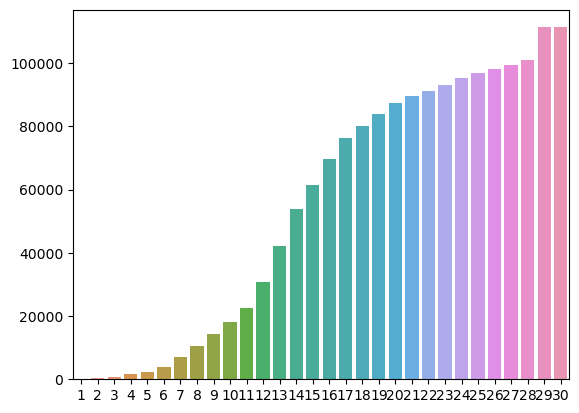

In [5]:
sns.barplot(data=pd.DataFrame(np.cumsum(pd.DataFrame(data=case_length_no, index=(range(1))).loc[0])).T)

<Axes: >

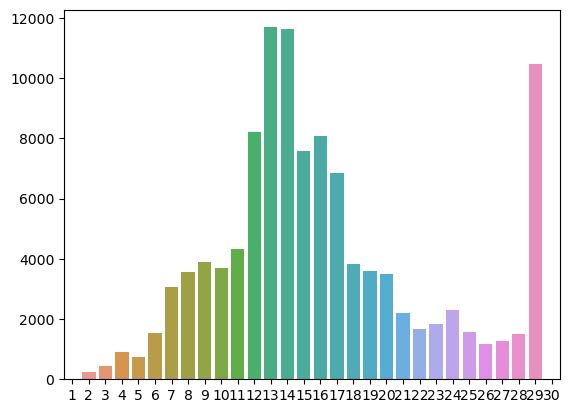

In [6]:
sns.barplot(pd.DataFrame(data=case_length_no, index=(range(1))))

In [7]:

alg_list=['rf','xgb','lstm']
app_list=['_agg_base','_agg','_plus','_idx']
app_list3=['_AGG','_AAGG','_CAGG','_IDX']
fold_list=['Results_RF','Results_XGB', 'Results_LSTM']
event_max=31

folders=3
appr=4
eval_columns=[]
cls_rows=['E 1']

for i in range(1,30):
    eval_columns.append('case_length_{}'.format(i))
    cls_rows.append('E {}'.format(i+1))
    
eval_columns.append('Approach')
eval_columns.append('Prediction Point')

full_set=pd.DataFrame(columns=eval_columns)

for f in range(folders):
    
    folder=fold_list[f]
    alg=alg_list[f]
    
    for a in range(appr):
        
        app=app_list[a]
        app3=app_list3[a]
        print(alg+app)
        app2=app
        i=0
        for cls in ['','_c','_c2']:
            eval_set=pd.DataFrame(columns=range(0,29))
            av_list=[]
            for event_nr in range(1,event_max):
                if event_nr==31:
                    event_nr='all'
                    
                if alg=='lstm':
                    app='_lstm'
                    app2=''
                    app3=''
                    
                file_read='Results/{}{}/av_roc{}{}_{}.csv'.format(folder,app3,cls,app,event_nr)
                eval_set=pd.concat([eval_set,pd.read_csv(file_read, header=None)])
                eval_set['Approach']='{}{}{}'.format(alg.upper(),app3,cls)
                
                if alg=='lstm':
                    eval_set['Approach']='LSTM'


            eval_set['Prediciton Point']=cls_rows
            eval_set.columns=eval_columns
            eval_set.reset_index(drop=True, inplace=True)
            for i in range(1,30):
                eval_set.loc[i:,'case_length_{}'.format(i)]=np.NaN

#                     eval_set=eval_set.T
#                 eval_set['Algorithm']='{}{}'.format(alg,cls)

            full_set=pd.concat([full_set,eval_set])
    
            if alg=='lstm':
                break
        if alg=='lstm':
            break
        




rf_agg_base
rf_agg
rf_plus
rf_idx
xgb_agg_base
xgb_agg
xgb_plus
xgb_idx
lstm_agg_base


In [8]:
full_set.reset_index(drop=True, inplace=True)

In [9]:
app_list=full_set['Approach'].unique()
app_list=['RF_AGG','RF_AAGG','RF_CAGG','RF_IDX','XGB_AGG','XGB_AAGG','XGB_CAGG','XGB_IDX','LSTM']

In [10]:
app_list

['RF_AGG',
 'RF_AAGG',
 'RF_CAGG',
 'RF_IDX',
 'XGB_AGG',
 'XGB_AAGG',
 'XGB_CAGG',
 'XGB_IDX',
 'LSTM']

In [11]:
long_set=pd.DataFrame(columns=['Approach','Case_Length','ROC','Prediction Point'])


for approach in app_list:#list(full_set['Approach'].unique()):
    for i in range(2,30):
        temp=full_set[full_set['Approach']==approach]
        temp['ROC']=temp['case_length_{}'.format(i)]
        temp['Case_Length']='CL_{}'.format(i)
        temp=temp[['ROC','Case_Length','Prediction Point','Approach']]
        long_set=pd.concat([long_set,temp])
    
long_set.reset_index(drop=True, inplace=True)

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['ROC']=temp['case_length_{}'.format(i)]
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Case_Length']='CL_{}'.format(i)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['ROC']=temp['case_length_{}'.format(i)]
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Case_Length']='CL_{}'.format(i)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['ROC']=temp['case_length_{}'.format(i)]
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Case_Length']='CL_{}'.format(i)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['ROC']=temp['case_length_{}'.format(i)]
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Case_Length']='CL_{}'.format(i)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\1541533313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [12]:
long_set.dropna(how='any', inplace=True)
long_set.reset_index(inplace=True, drop=True)
#long_set['ROC']=np.where(long_set['ROC']<0.5,1-long_set['ROC'],long_set['ROC'])

In [13]:
long_set_weighted=long_set.copy(deep=True)
total=111340
for i in range(2,30):
    long_set_weighted['ROC']=np.where(long_set_weighted['Case_Length']=='CL_{}'.format(i),long_set_weighted['ROC']*case_length_no[i],long_set_weighted['ROC'])

    
for i in range(1,30):
    long_set_weighted['ROC']=np.where(long_set_weighted['Prediction Point']=='E {}'.format(i),long_set_weighted['ROC']/total,long_set_weighted['ROC'])
    total-=case_length_no[i]

In [14]:
long_set.dropna(how='any', inplace=True)
long_set.reset_index(inplace=True, drop=True)


mean_set_pp=long_set.groupby(['Approach','Prediction Point']).mean(['ROC'])
mean_set_pp.reset_index(inplace=True)

mean_set_pp_w=long_set_weighted.groupby(['Approach','Prediction Point']).sum(['ROC'])
mean_set_pp_w.reset_index(inplace=True)

mean_set_cl=long_set.groupby(['Approach','Case_Length']).mean(['ROC'])
mean_set_cl.reset_index(inplace=True)

approach_list=list(mean_set_cl['Approach'].unique())
cl_list=list(mean_set_cl['Case_Length'].unique())
pp_list=list(mean_set_pp['Prediction Point'].unique())

In [15]:
mean_set_pp_w

Approach Prediction Point       ROC
0        LSTM              E 1  0.494597
1        LSTM             E 10  0.536518
2        LSTM             E 11  0.487020
3        LSTM             E 12  0.536266
4        LSTM             E 13  0.511378
5        LSTM             E 14  0.441542
6        LSTM             E 15  0.543096
7        LSTM             E 16  0.529945
8        LSTM             E 17  0.579064
9        LSTM             E 18  0.602292
10       LSTM             E 19  0.453666
11       LSTM              E 2  0.497460
12       LSTM             E 20  0.395440
13       LSTM             E 21  0.590618
14       LSTM             E 22  0.497558
15       LSTM             E 23  0.572244
16       LSTM             E 24  0.573203
17       LSTM             E 25  0.500694
18       LSTM             E 26  0.334632
19       LSTM             E 27  0.536963
20       LSTM             E 28  0.571506
21       LSTM             E 29  0.372059
22       LSTM              E 3  0.505783
23       LSTM              E 4  0.486668
24       LSTM              E 5  0.511270
25       LSTM              E 6  0.510706
26       LSTM              E 7  0.495510
27       LSTM              E 8  0.520946
28       LSTM              E 9  0.520007
29    RF_AAGG              E 1  0.803440
30    RF_AAGG             E 10  0.793891
31    RF_AAGG             E 11  0.789169
32    RF_AAGG             E 12  0.787738
33    RF_AAGG             E 13  0.780565
34    RF_AAGG             E 14  0.766468
35    RF_AAGG             E 15  0.760981
36    RF_AAGG             E 16  0.743365
37    RF_AAGG             E 17  0.713915
38    RF_AAGG             E 18  0.728099
39    RF_AAGG             E 19  0.721624
40    RF_AAGG              E 2  0.801676
41    RF_AAGG             E 20  0.734684
42    RF_AAGG             E 21  0.695072
43    RF_AAGG             E 22  0.742541
44    RF_AAGG             E 23  0.717723
45    RF_AAGG             E 24  0.707645
46    RF_AAGG             E 25  0.694625
47    RF_AAGG             E 26  0.707090
48    RF_AAGG             E 27  0.693585
49    RF_AAGG             E 28  0.658206
50    RF_AAGG             E 29  0.620956
51    RF_AAGG              E 3  0.801466
52    RF_AAGG              E 4  0.800753
53    RF_AAGG              E 5  0.806861
54    RF_AAGG              E 6  0.800005
55    RF_AAGG              E 7  0.802694
56    RF_AAGG              E 8  0.800266
57    RF_AAGG              E 9  0.799228
58     RF_AGG              E 1  0.802329
59     RF_AGG             E 10  0.797581
60     RF_AGG             E 11  0.766637
61     RF_AGG             E 12  0.795694
62     RF_AGG             E 13  0.780162
63     RF_AGG             E 14  0.752697
64     RF_AGG             E 15  0.761727
65     RF_AGG             E 16  0.744706
66     RF_AGG             E 17  0.717879
67     RF_AGG             E 18  0.737073
68     RF_AGG             E 19  0.724940
69     RF_AGG              E 2  0.802638
70     RF_AGG             E 20  0.703112
71     RF_AGG             E 21  0.707806
72     RF_AGG             E 22  0.717812
73     RF_AGG             E 23  0.704795
74     RF_AGG             E 24  0.730194
75     RF_AGG             E 25  0.705208
76     RF_AGG             E 26  0.707949
77     RF_AGG             E 27  0.674252
78     RF_AGG             E 28  0.662382
79     RF_AGG             E 29  0.622059
80     RF_AGG              E 3  0.802602
81     RF_AGG              E 4  0.802989
82     RF_AGG              E 5  0.805204
83     RF_AGG              E 6  0.802494
84     RF_AGG              E 7  0.803043
85     RF_AGG              E 8  0.802162
86     RF_AGG              E 9  0.802298
87    RF_CAGG              E 1  0.801982
88    RF_CAGG             E 10  0.759321
89    RF_CAGG             E 11  0.753030
90    RF_CAGG             E 12  0.759492
91    RF_CAGG             E 13  0.773535
92    RF_CAGG             E 14  0.760706
93    RF_CAGG             E 15  0.746574
94    RF_CAGG             E 16  0.708562
95    RF_CAGG             E 17  0.705502
96    RF_CAGG             E 

In [16]:
display_df_cl=pd.DataFrame(columns=['Approach'])


for app in app_list:
    temp=mean_set_cl[mean_set_cl['Approach']==app]
    temp=temp[['Case_Length','ROC']].T
    temp.columns=temp.iloc[0,:]
    temp.reset_index(drop=True, inplace=True)
    temp.drop(0, inplace=True)
    temp['Approach']=app
    display_df_cl=pd.concat([display_df_cl,temp])
    
display_df_cl.set_index('Approach',inplace=True)
display_df_cl=display_df_cl[sorted(display_df_cl.columns, key=lambda x: int(x[3:]))]
display_df_cl.to_excel('display_cl_roc.xlsx')

In [17]:
display_df_cl

CL_2      CL_3      CL_4      CL_5      CL_6      CL_7  \
Approach                                                               
RF_AGG    0.875254  0.953427  0.722677  0.909674   0.87885   0.85872   
RF_AAGG   0.875205  0.956291  0.706349  0.914445  0.881221  0.860092   
RF_CAGG   0.875237  0.937564  0.733084  0.907027  0.873121   0.85578   
RF_IDX    0.875364  0.949834   0.78261  0.895405  0.876836  0.874876   
XGB_AGG   0.870671  0.938786  0.860035  0.874801  0.882379  0.853207   
XGB_AAGG  0.887111  0.934112  0.860232  0.870803  0.884181  0.860196   
XGB_CAGG  0.894615  0.951385  0.758635  0.843587  0.862416  0.849237   
XGB_IDX   0.880581  0.853745  0.829542  0.827768  0.852553  0.837827   
LSTM      0.476612  0.473495  0.488698  0.518883  0.507906  0.518745   

              CL_8      CL_9     CL_10     CL_11     CL_12     CL_13  \
Approach                                                               
RF_AGG    0.801913   0.91187  0.861782  0.847527  0.886653  0.855846   
RF_AAGG   0.805155  0.910197  0.863953  0.846339  0.890104  0.863061   
RF_CAGG   0.808866  0.915205  0.864316  0.858652  0.869011  0.807462   
RF_IDX    0.843298  0.914268  0.869068  0.867764  0.850321  0.752836   
XGB_AGG   0.740841  0.882514  0.870752  0.852952  0.919011  0.865297   
XGB_AAGG  0.772821  0.882178  0.870178  0.843043  0.915978  0.871475   
XGB_CAGG  0.715534  0.911206  0.876392  0.877067  0.901113  0.862971   
XGB_IDX   0.708257  0.890345  0.879644  0.890543  0.894763  0.879393   
LSTM      0.492445  0.519236  0.512938  0.520844  0.517254  0.498857   

             CL_14     CL_15     CL_16     CL_17     CL_18     CL_19  \
Approach                                                               
RF_AGG    0.832718  0.901789  0.825697   0.57996  0.827188  0.795748   
RF_AAGG   0.843493  0.899897  0.814599   0.57572  0.822297  0.797253   
RF_CAGG   0.821932  0.892375  0.819509  0.573716  0.825438  0.797479   
RF_IDX    0.787017  0.898826  0.844734  0.602088  0.812706  0.777782   
XGB_AGG   0.889868  0.898557  0.875769   0.60139  0.831168  0.694573   
XGB_AAGG  0.894585  0.905706  0.864244  0.604609  0.820517  0.699035   
XGB_CAGG  0.881725  0.893835  0.905843  0.621671  0.833306  0.748456   
XGB_IDX   0.904013  0.912032  0.912078  0.629827  0.827743   0.75964   
LSTM      0.512078  0.516833  0.496052   0.51872  0.532626  0.521445   

             CL_20     CL_21     CL_22     CL_23     CL_24     CL_25  \
Approach                                                               
RF_AGG     0.68161  0.703247  0.920274  0.776854  0.805981  0.613312   
RF_AAGG   0.679928  0.700673  0.925799  0.773297  0.811603  0.614151   
RF_CAGG   0.696975  0.703515  0.928137  0.781142  0.797337  0.587706   
RF_IDX    0.677388  0.675258  0.914858  0.749707  0.753341  0.564712   
XGB_AGG   0.635081  0.813952  0.887877  0.653411  0.850761  0.748987   
XGB_AAGG  0.663418  0.779054  0.893525  0.693936  0.834726  0.730977   
XGB_CAGG     0.641  0.813384  0.900334  0.681531  0.850926   0.78427   
XGB_IDX   0.676962  0.820706  0.939927  0.741575  0.846689  0.711463   
LSTM      0.504195  0.515901  0.527322  0.517842  0.458536  0.503318   

             CL_26     CL_27     CL_28     CL_29  
Approach                                          
RF_AGG    0.639793  0.850336       1.0  0.636258  
RF_AAGG   0.649451  0.854149       1.0  0.635681  
RF_CAGG   0.648954  0.793559       1.0  0.588438  
RF_IDX    0.660831  0.714578       1.0  0.604025  
XGB_AGG   0.691716  0.889491       1.0  0.659888  
XGB_AAGG  0.665004  0.832292       1.0  0.656706  
XGB_CAGG  0.691336  0.852824       1.0   0.64091  
XGB_IDX   0.676078  0.807812       1.0  0.617273  
LSTM      0.539307  0.505417  0.557143  0.494422

In [18]:
display_df_pp=pd.DataFrame(columns=['Approach'])


for app in app_list:
    temp=mean_set_pp[mean_set_pp['Approach']==app]
    temp=temp[['Prediction Point','ROC']].T
    temp.columns=temp.iloc[0,:]
    temp.reset_index(drop=True, inplace=True)
    temp.drop(0, inplace=True)
    temp['Approach']=app
    display_df_pp=pd.concat([display_df_pp,temp])
    
display_df_pp.set_index('Approach',inplace=True)
display_df_pp=display_df_pp[sorted(display_df_pp.columns, key=lambda x: int(x[2:]))]
display_df_pp.to_excel('display_pp_roc.xlsx')

In [19]:
display_df_pp_w=pd.DataFrame(columns=['Approach'])


for app in app_list:
    temp=mean_set_pp_w[mean_set_pp_w['Approach']==app]
    temp=temp[['Prediction Point','ROC']].T
    temp.columns=temp.iloc[0,:]
    temp.reset_index(drop=True, inplace=True)
    temp.drop(0, inplace=True)
    temp['Approach']=app
    display_df_pp_w=pd.concat([display_df_pp_w,temp])
    
display_df_pp_w.set_index('Approach',inplace=True)
display_df_pp_w=display_df_pp_w[sorted(display_df_pp_w.columns, key=lambda x: int(x[2:]))]
display_df_pp_w.to_excel('display_pp_roc.xlsx')

In [20]:
#display_df_pp_w.loc['LSTM']=np.where(display_df_pp_w.loc['LSTM']<0.5,1-display_df_pp_w.loc['LSTM'],display_df_pp_w.loc['LSTM'])

In [21]:
display_df_pp_w.columns=range(1,30)

In [29]:
display_df_pp_w.T

Approach    RF_AGG   RF_AAGG   RF_CAGG    RF_IDX   XGB_AGG  XGB_AAGG  \
1         0.802329   0.80344  0.801982  0.803317  0.816156  0.815098   
2         0.802638  0.801676  0.796711  0.791482  0.810381  0.813507   
3         0.802602  0.801466  0.808424  0.783353  0.805878  0.803084   
4         0.802989  0.800753  0.805724   0.78173  0.805404  0.806515   
5         0.805204  0.806861  0.790033  0.777991  0.808797  0.810248   
6         0.802494  0.800005  0.766641  0.782014  0.818332  0.810192   
7         0.803043  0.802694  0.785669  0.776297  0.824572  0.824012   
8         0.802162  0.800266  0.784108  0.768828  0.817693  0.814777   
9         0.802298  0.799228  0.786814  0.770961  0.816562  0.805393   
10        0.797581  0.793891  0.759321  0.765784   0.81078  0.816861   
11        0.766637  0.789169   0.75303  0.758793  0.811274  0.812038   
12        0.795694  0.787738  0.759492  0.749409  0.809822  0.807153   
13        0.780162  0.780565  0.773535  0.733431  0.793067  0.789214   
14        0.752697  0.766468  0.760706  0.729067  0.777907  0.792551   
15        0.761727  0.760981  0.746574  0.713377  0.750346  0.780218   
16        0.744706  0.743365  0.708562  0.707556  0.744205  0.747798   
17        0.717879  0.713915  0.705502  0.686487  0.716468  0.727789   
18        0.737073  0.728099   0.73263  0.703258  0.741164   0.72232   
19         0.72494  0.721624  0.725753   0.70863   0.70689  0.740695   
20        0.703112  0.734684  0.659581   0.70894  0.751062  0.767492   
21        0.707806  0.695072  0.707264  0.670498  0.762184  0.774062   
22        0.717812  0.742541  0.683233  0.724832  0.767343  0.772508   
23        0.704795  0.717723  0.710845  0.724605  0.746966  0.718626   
24        0.730194  0.707645  0.702249  0.673713  0.749206  0.700685   
25        0.705208  0.694625  0.664112  0.663625  0.699269  0.765058   
26        0.707949   0.70709   0.63149  0.671232  0.734017   0.64441   
27        0.674252  0.693585  0.600139  0.674641  0.787463  0.655513   
28        0.662382  0.658206  0.597814  0.681335  0.703179  0.657242   
29        0.622059  0.620956  0.555882  0.699081  0.741176  0.707353   

Approach  XGB_CAGG   XGB_IDX      LSTM  
1         0.812946  0.815326  0.494597  
2         0.815825  0.807716   0.49746  
3         0.819393  0.803606  0.505783  
4         0.817935  0.805615  0.486668  
5          0.81925  0.815988   0.51127  
6           0.8221   0.81954  0.510706  
7         0.820514  0.826573   0.49551  
8         0.814783  0.821483  0.520946  
9         0.821706   0.82769  0.520007  
10        0.808533  0.827457  0.536518  
11        0.794562  0.819843   0.48702  
12        0.805432  0.820124  0.536266  
13        0.807585  0.809301  0.511378  
14        0.783973   0.79989  0.441542  
15        0.755249  0.784816  0.543096  
16        0.769712  0.761784  0.529945  
17        0.740496  0.730758  0.579064  
18        0.763193  0.739977  0.602292  
19        0.754191   0.72758  0.453666  
20         0.75469  0.739018   0.39544  
21        0.711094  0.732791  0.590618  
22        0.757911  0.733848  0.497558  
23        0.743063  0.717881  0.572244  
24        0.727909  0.727187  0.573203  
25        0.702736  0.711316  0.500694  
26        0.694581   0.71843  0.334632  
27        0.682942  0.711349  0.536963  
28        0.675232  0.686475  0.571506  
29        0.621691  0.646324  0.372059

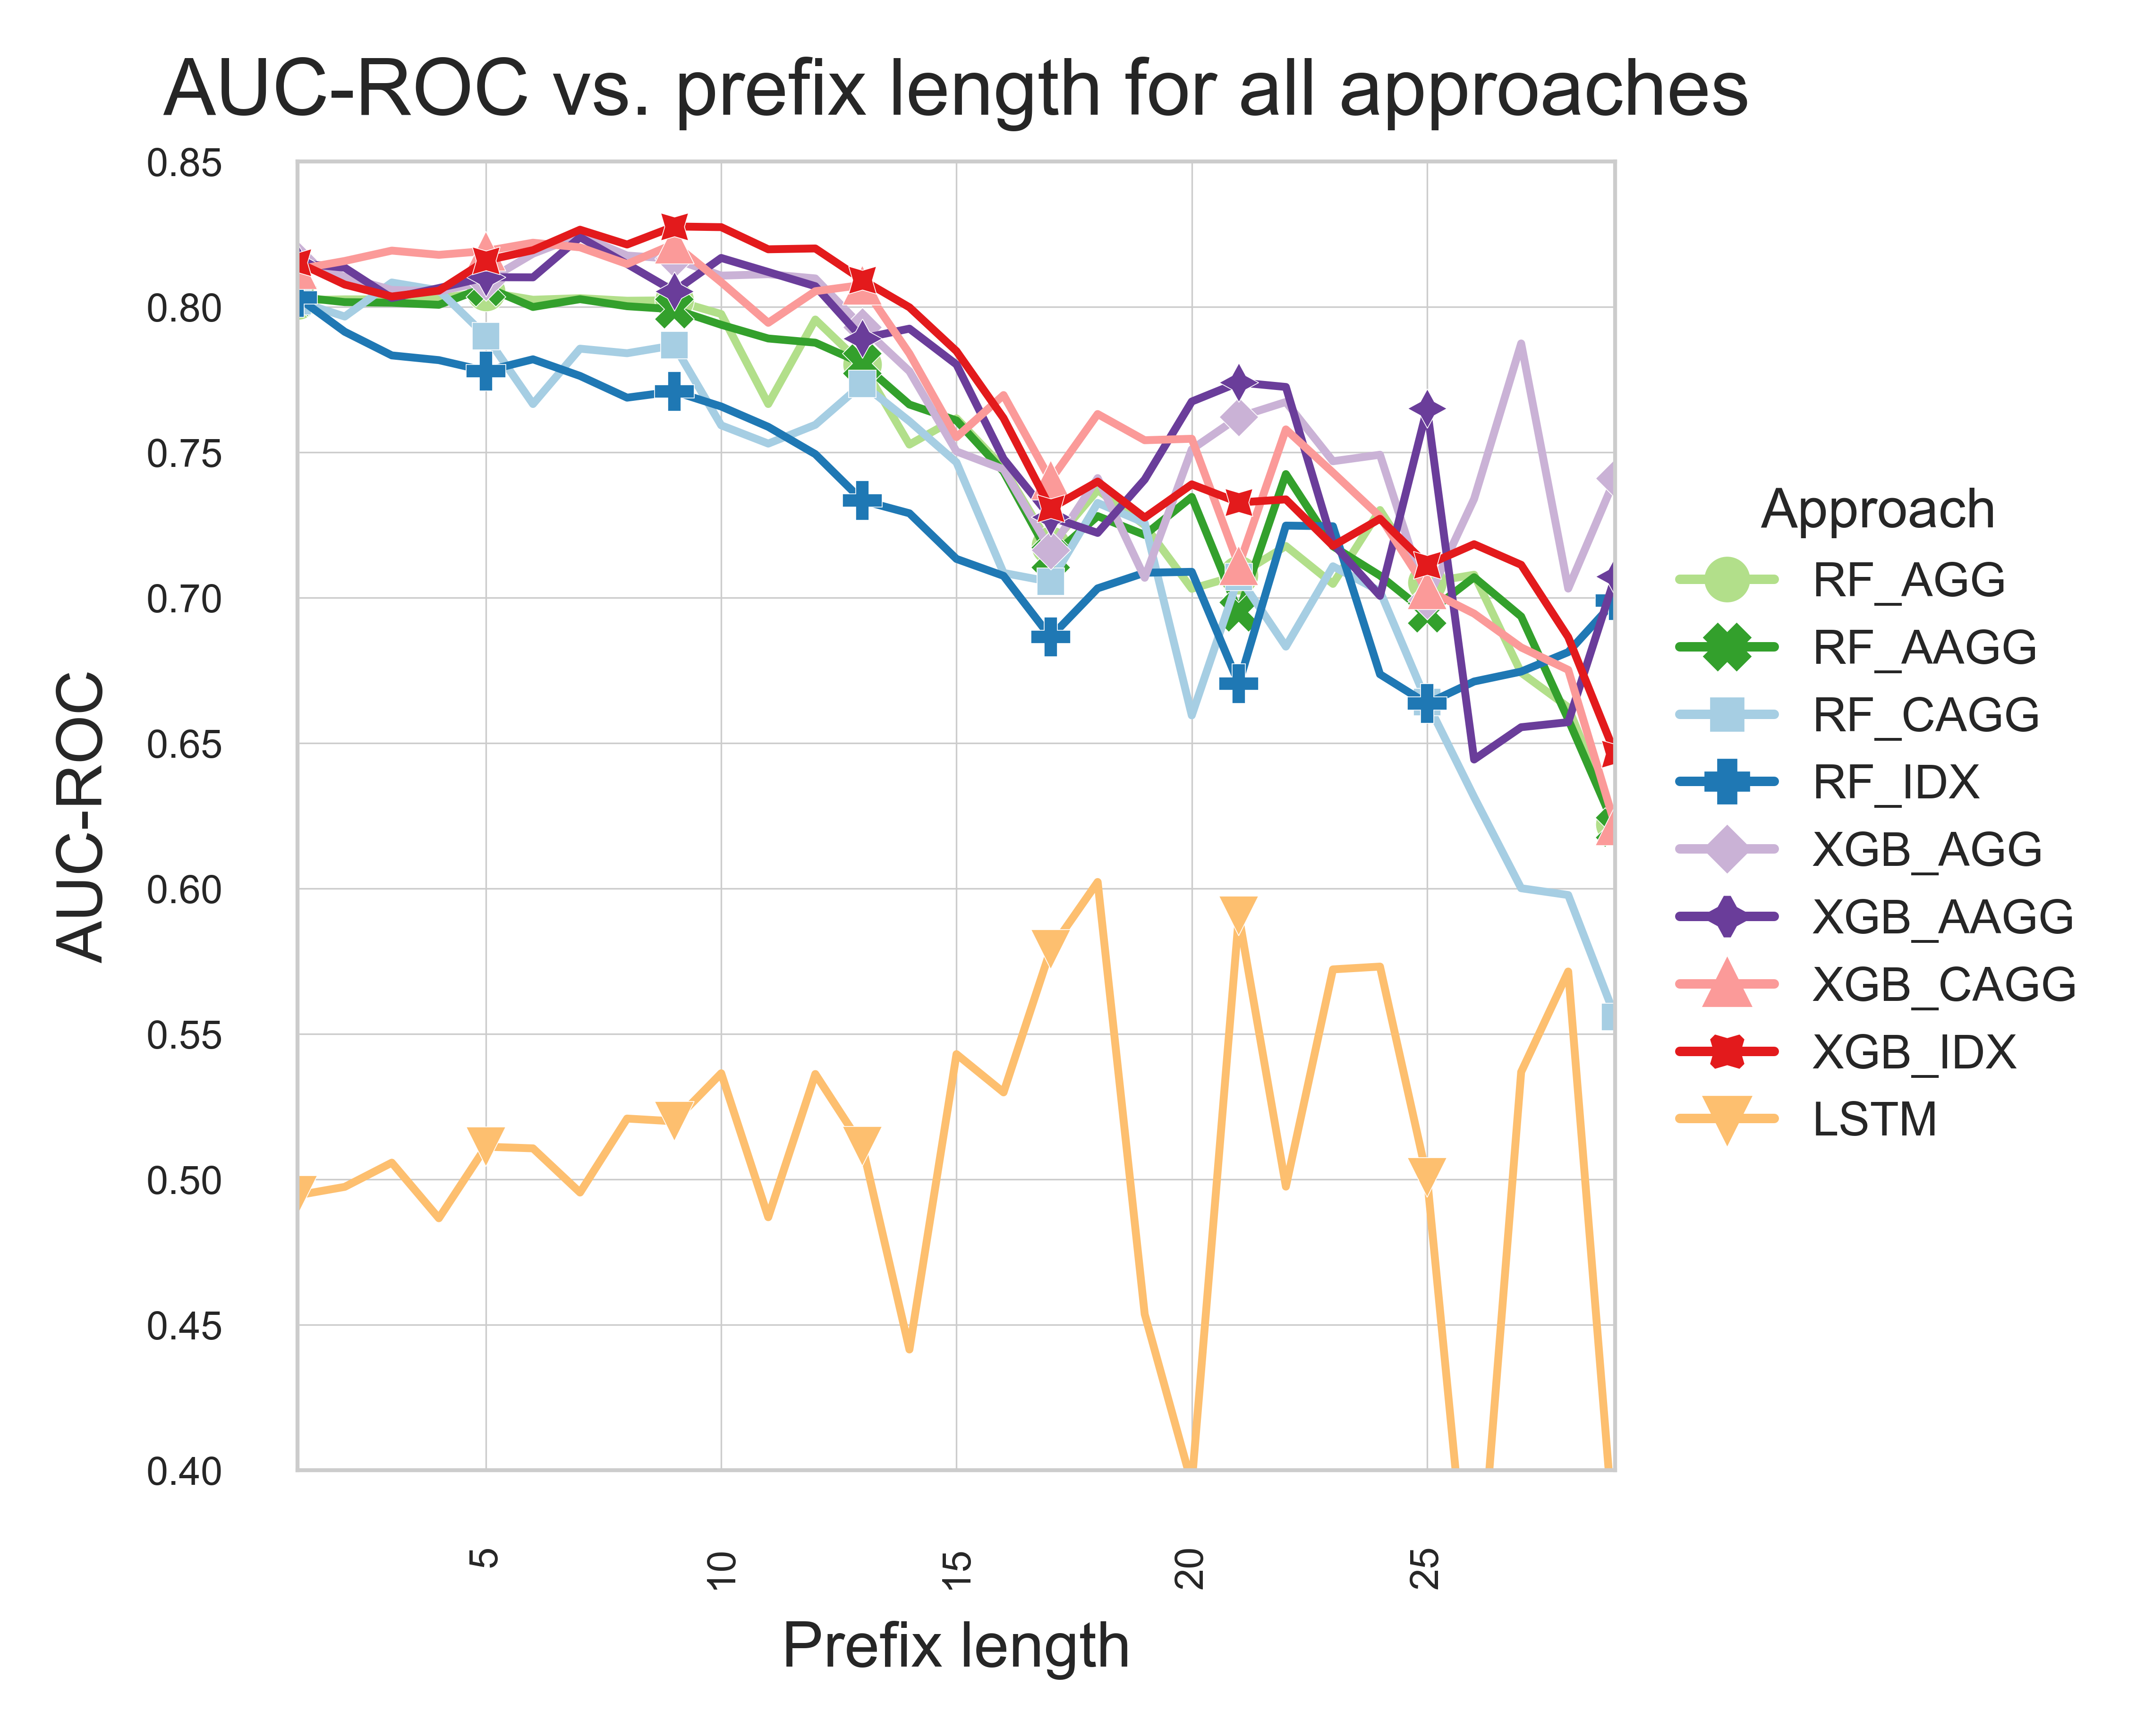

In [27]:
sns.set(rc={'figure.figsize':(3,3), 'xtick.top' : False, 'figure.dpi':1200})
sns.set_theme(style="whitegrid", rc={'grid.linewidth':0.2})
plt.ticklabel_format(style='plain', axis='y')
sns.set_palette(palette)
sns.set_context("paper")
s=sns.lineplot(data=display_df_pp_w.T,legend=True, dashes=False, markers=True, markevery=4, linewidth= 1,markersize=5,markeredgewidth=0.1)
s.set(ylim=(0.4,0.85))
s.set(xlim=(1,29))

s.axes.set_title("AUC-ROC vs. prefix length for all approaches",fontsize=10)
s.set_xlabel("Prefix length",fontsize=8)
s.set_ylabel("AUC-ROC",fontsize=8)
s.tick_params(labelsize=5)

s.spines['left'].set_linewidth(0.5)
s.spines['bottom'].set_linewidth(0.5)
s.spines['top'].set_linewidth(0.5)
s.spines['right'].set_linewidth(0.5)
plt.xticks(rotation=90)

#plt.legend()
sns.move_legend(s, "center",bbox_to_anchor=(1.2, 0.5), ncol=1, title='Approach', frameon=False,fontsize=6,title_fontsize=7)


In [32]:
meanlong_auc_roc_df=long_set.groupby(['Approach','Case_Length'],sort=False).mean('ROC').reset_index()
mean_auc_roc_df=long_set.groupby(['Approach','Case_Length'],sort=False).mean('ROC').reset_index().pivot(index='Approach', columns='Case_Length')

In [33]:
mean_auc_roc_df

ROC                                                    \
Case_Length     CL_10     CL_11     CL_12     CL_13     CL_14     CL_15   
Approach                                                                  
LSTM         0.512938  0.520844  0.517254  0.498857  0.512078  0.516833   
RF_AAGG      0.863953  0.846339  0.890104  0.863061  0.843493  0.899897   
RF_AGG       0.861782  0.847527  0.886653  0.855846  0.832718  0.901789   
RF_CAGG      0.864316  0.858652  0.869011  0.807462  0.821932  0.892375   
RF_IDX       0.869068  0.867764  0.850321  0.752836  0.787017  0.898826   
XGB_AAGG     0.870178  0.843043  0.915978  0.871475  0.894585  0.905706   
XGB_AGG      0.870752  0.852952  0.919011  0.865297  0.889868  0.898557   
XGB_CAGG     0.876392  0.877067  0.901113  0.862971  0.881725  0.893835   
XGB_IDX      0.879644  0.890543  0.894763  0.879393  0.904013  0.912032   

                                                                         \
Case_Length     CL_16     CL_17     CL_18     CL_19      CL_2     CL_20   
Approach                                                                  
LSTM         0.496052  0.518720  0.532626  0.521445  0.476612  0.504195   
RF_AAGG      0.814599  0.575720  0.822297  0.797253  0.875205  0.679928   
RF_AGG       0.825697  0.579960  0.827188  0.795748  0.875254  0.681610   
RF_CAGG      0.819509  0.573716  0.825438  0.797479  0.875237  0.696975   
RF_IDX       0.844734  0.602088  0.812706  0.777782  0.875364  0.677388   
XGB_AAGG     0.864244  0.604609  0.820517  0.699035  0.887111  0.663418   
XGB_AGG      0.875769  0.601390  0.831168  0.694573  0.870671  0.635081   
XGB_CAGG     0.905843  0.621671  0.833306  0.748456  0.894615  0.641000   
XGB_IDX      0.912078  0.629827  0.827743  0.759640  0.880581  0.676962   

                                                                         \
Case_Length     CL_21     CL_22     CL_23     CL_24     CL_25     CL_26   
Approach                                                                  
LSTM         0.515901  0.527322  0.517842  0.458536  0.503318  0.539307   
RF_AAGG      0.700673  0.925799  0.773297  0.811603  0.614151  0.649451   
RF_AGG       0.703247  0.920274  0.776854  0.805981  0.613312  0.639793   
RF_CAGG      0.703515  0.928137  0.781142  0.797337  0.587706  0.648954   
RF_IDX       0.675258  0.914858  0.749707  0.753341  0.564712  0.660831   
XGB_AAGG     0.779054  0.893525  0.693936  0.834726  0.730977  0.665004   
XGB_AGG      0.813952  0.887877  0.653411  0.850761  0.748987  0.691716   
XGB_CAGG     0.813384  0.900334  0.681531  0.850926  0.784270  0.691336   
XGB_IDX      0.820706  0.939927  0.741575  0.846689  0.711463  0.676078   

                                                                         \
Case_Length     CL_27     CL_28     CL_29      CL_3      CL_4      CL_5   
Approach                                                                  
LSTM         0.505417  0.557143  0.494422  0.473495  0.488698  0.518883   
RF_AAGG      0.854149  1.000000  0.635681  0.956291  0.706349  0.914445   
RF_AGG       0.850336  1.000000  0.636258  0.953427  0.722677  0.909674   
RF_CAGG      0.793559  1.000000  0.588438  0.937564  0.733084  0.907027   
RF_IDX       0.714578  1.000000  0.604025  0.949834  0.782610  0.895405   
XGB_AAGG     0.832292  1.000000  0.656706  0.934112  0.860232  0.870803   
XGB_AGG      0.889491  1.000000  0.659888  0.938786  0.860035  0.874801   
XGB_CAGG     0.852824  1.000000  0.640910  0.951385  0.758635  0.843587   
XGB_IDX      0.807812  1.000000  0.617273  0.853745  0.829542  0.827768   

                                                     
Case_Length      CL_6      CL_7      CL_8      CL_9  
Approach                                             
LSTM         0.507906  0.518745  0.492445  0.519236  
RF_AAGG      0.881221  0.860092  0.805155  0.910197  
RF_AGG       0.878850  0.858720  0.801913  0.911870  
RF_CAGG      0.873121  0.855780  0.808866  0.915205  
RF_IDX       0.876836  0.874876  0.8

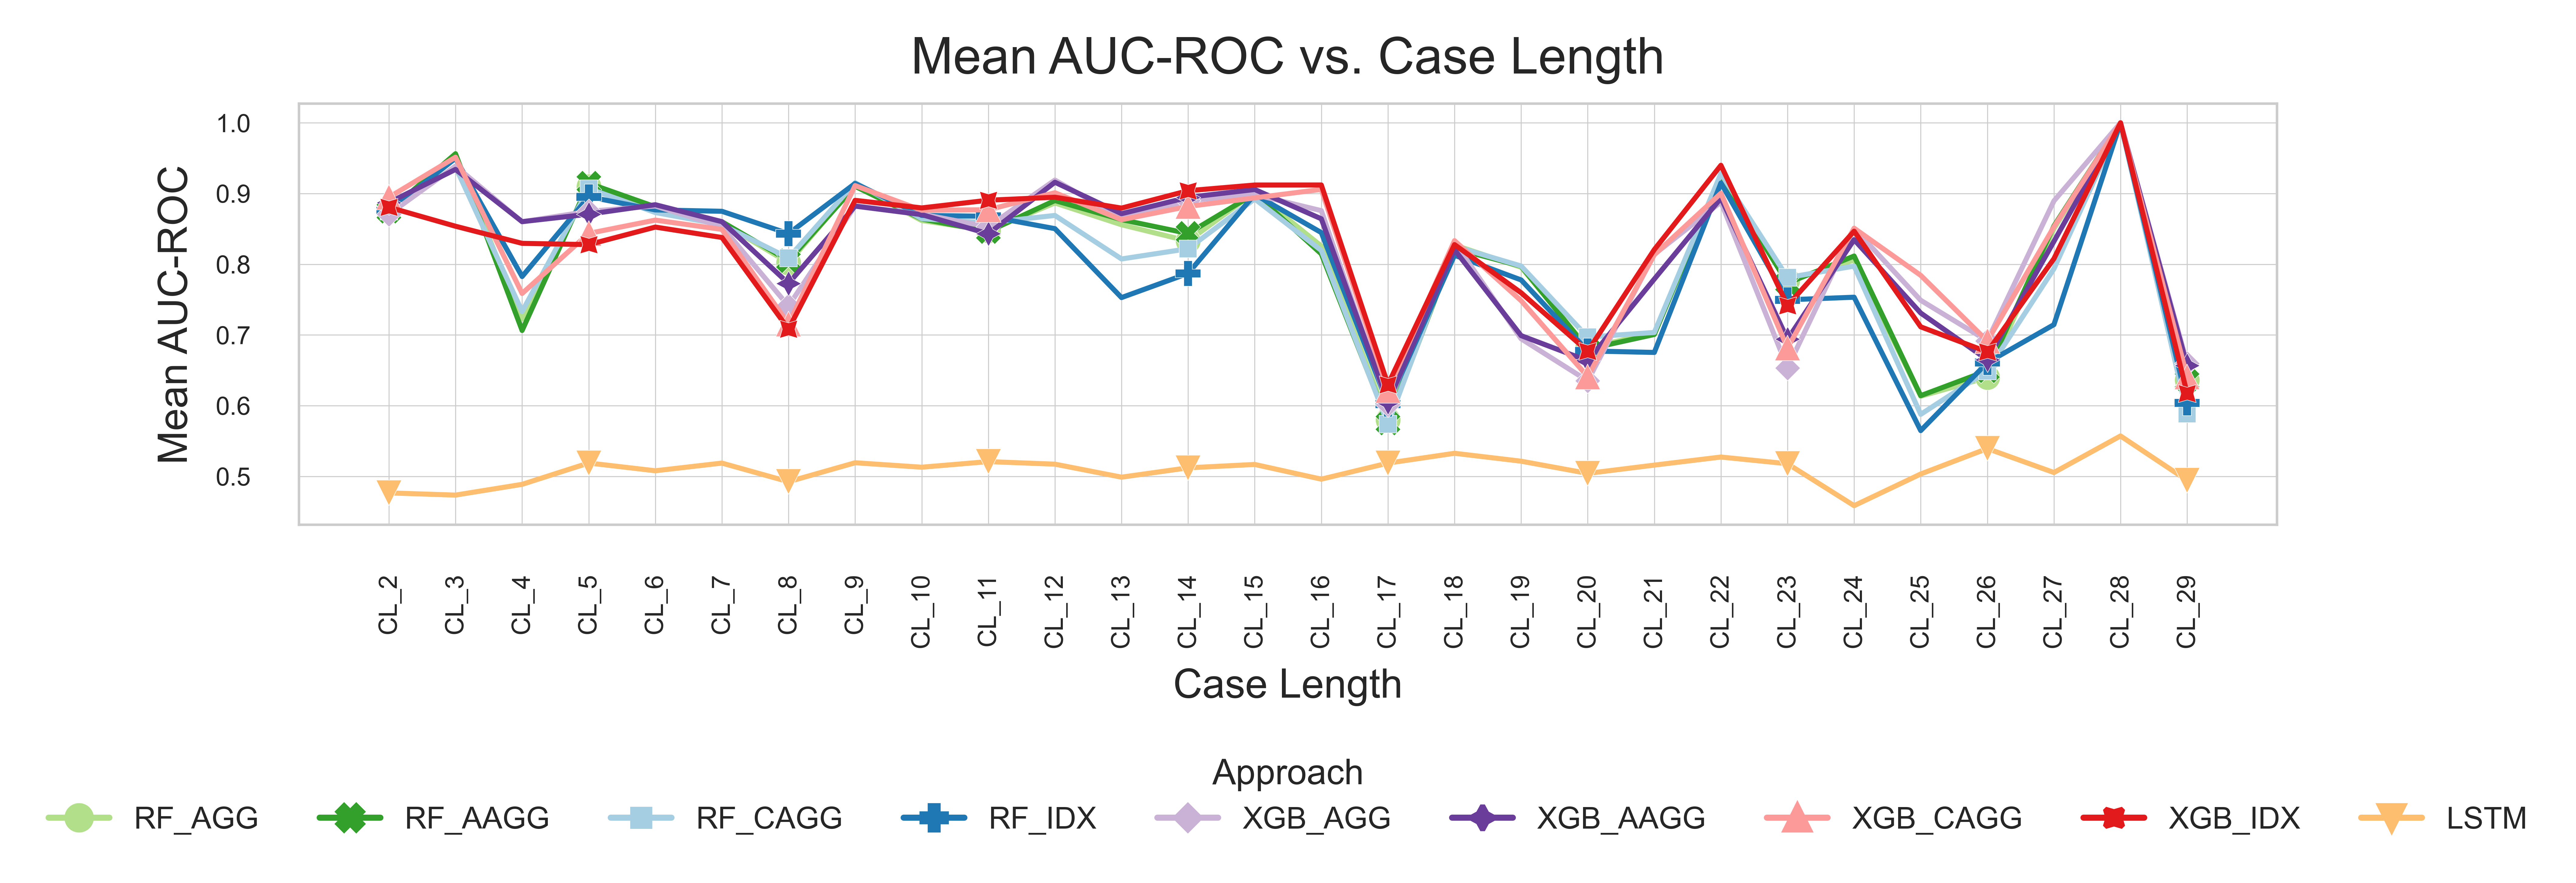

In [34]:
sns.set(rc={'figure.figsize':(7,1.5), 'xtick.top' : False, 'figure.dpi':1200})
sns.set_theme(style="whitegrid", rc={'grid.linewidth':0.2})
plt.ticklabel_format(style='plain', axis='y')
sns.set_palette(palette)
sns.set_context("paper")

s=sns.lineplot(data=meanlong_auc_roc_df, x='Case_Length',y='ROC', hue='Approach', style='Approach',
               legend=True, dashes=False, markers=True, markevery=3, linewidth= 1,markersize=5,markeredgewidth=0.1)

s.axes.set_title("Mean AUC-ROC vs. Case Length",fontsize=10)
s.set_xlabel("Case Length",fontsize=8)
s.set_ylabel("Mean AUC-ROC",fontsize=8)
s.tick_params(labelsize=5)
#plt.legend()
sns.move_legend(s, "lower center",bbox_to_anchor=(0.5,-0.8), ncol=9, title='Approach', frameon=False,fontsize=6,title_fontsize=7)
s.spines['left'].set_linewidth(0.5)
s.spines['bottom'].set_linewidth(0.5)
s.spines['top'].set_linewidth(0.5)
s.spines['right'].set_linewidth(0.5)
plt.xticks(rotation=90)

plt.savefig('Mean_AUC_ROC.svg',bbox_inches='tight')


In [35]:
long_set['Prefix Length']=long_set['Prediction Point'].apply(lambda x: int(x[2:]))

In [36]:
long_set

Approach Case_Length       ROC Prediction Point  Prefix Length
0      RF_AGG        CL_2  0.874894              E 1              1
1      RF_AGG        CL_2  0.875614              E 2              2
2      RF_AGG        CL_3  0.952838              E 1              1
3      RF_AGG        CL_3  0.952606              E 2              2
4      RF_AGG        CL_3  0.954837              E 3              3
...       ...         ...       ...              ...            ...
3901     LSTM       CL_29  0.483824             E 25             25
3902     LSTM       CL_29  0.280882             E 26             26
3903     LSTM       CL_29  0.527941             E 27             27
3904     LSTM       CL_29  0.552941             E 28             28
3905     LSTM       CL_29  0.372059             E 29             29

[3906 rows x 5 columns]

In [219]:

c=1

for i in range (2,30):

    if i%4==0:
        c+=1
    sns.set(rc={ 'figure.figsize':(1,1), 'xtick.top' : False, 'figure.dpi':600})
    sns.set_theme(style="whitegrid", rc={'grid.linewidth':0.2})
    plt.ticklabel_format(style='plain', axis='y')
    sns.set_palette(palette)
    sns.set_context("paper")
    sns.despine()
    s=sns.lineplot(data=long_set[long_set['Case_Length']=='CL_{}'.format(i)], 
                   x='Prefix Length', y="ROC", hue='Approach',style='Approach',
                   dashes=False, markers=True, markevery=c,legend=False,
                   linewidth= 0.5,markersize=2.5,markeredgewidth=0.1, errorbar=None)
    
    
    s.set(ylim=(0.4,1))
    s.set(xlim=(1,i))
    s.axes.set_title("Case Length {}".format(i),fontsize=8)
    s.set_xlabel(None)
    s.set_ylabel(None)
    s.tick_params(labelsize=5)
    s.set_xticks(range(1,i+1,c))
    s.spines['left'].set_linewidth(0.3)
    s.spines['bottom'].set_linewidth(0.3)

    #sns.move_legend(s, "lower center",bbox_to_anchor=(0, -1), ncol=9, title='Approach', frameon=False,fontsize=6,title_fontsize=7)

    plt.savefig('grid_CL_{}.svg'.format(i),bbox_inches='tight')
    plt.clf()


<Figure size 600x600 with 0 Axes>

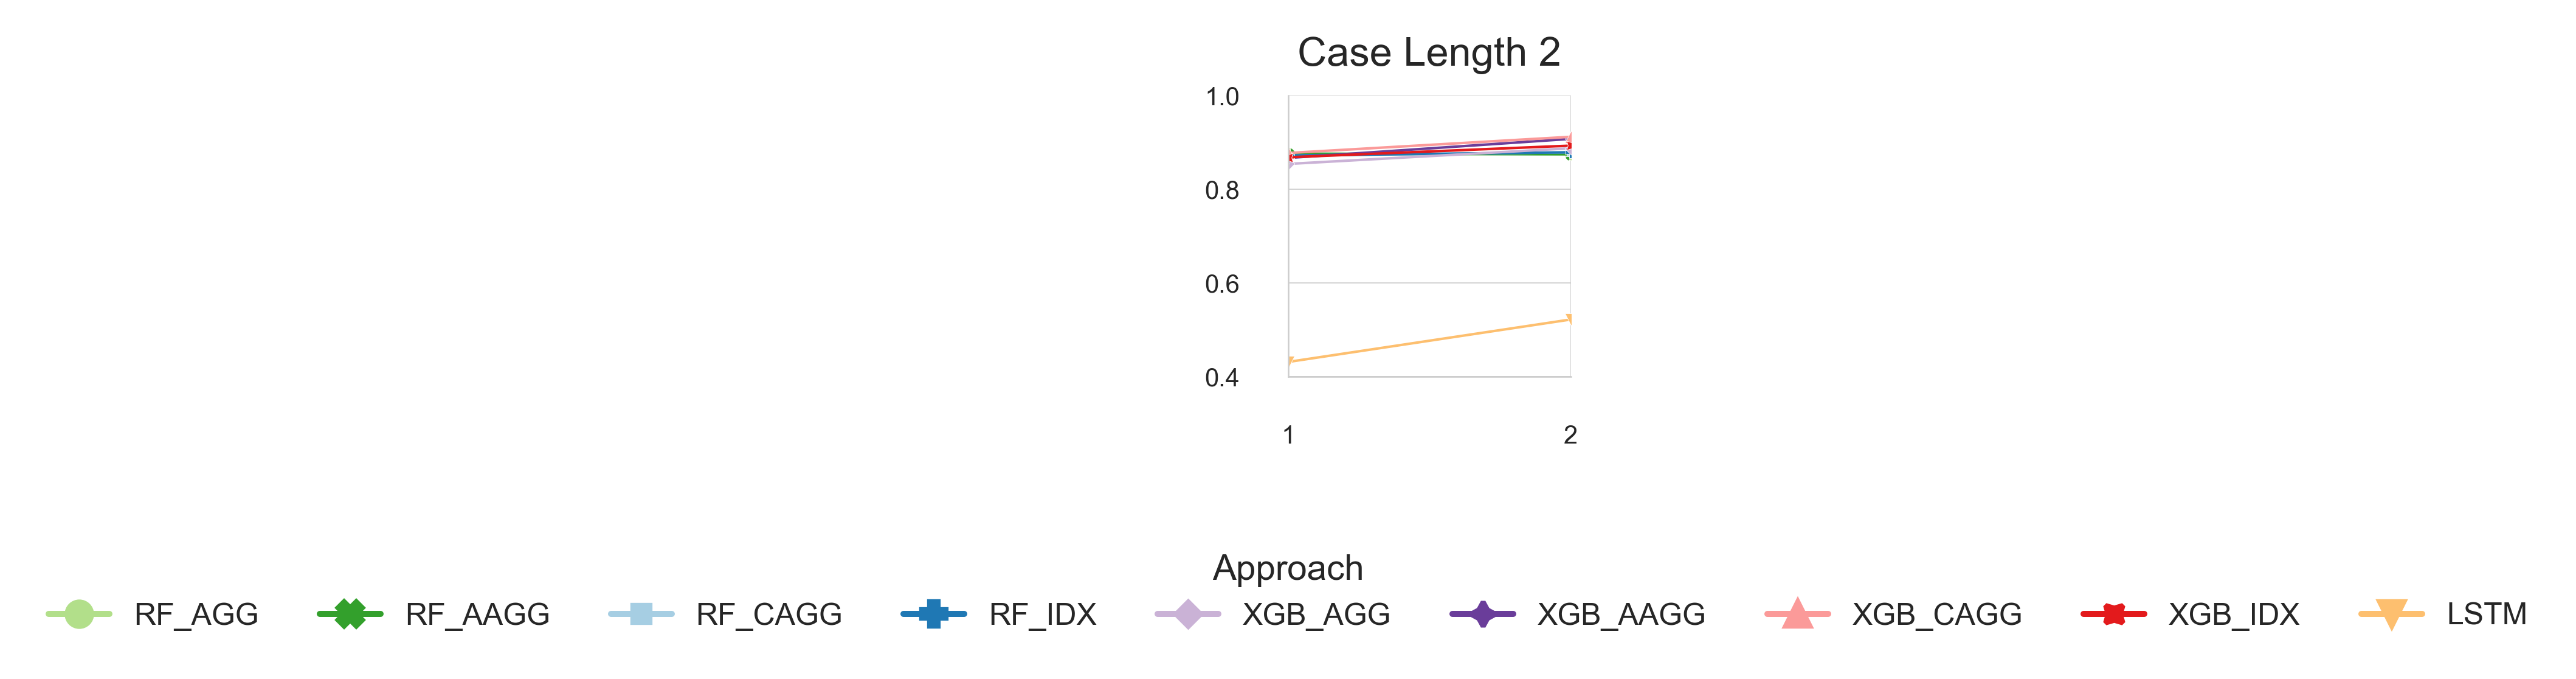

In [228]:

i=2
c=1

if i%4==0:
    c+=1
sns.set(rc={ 'figure.figsize':(1,1), 'xtick.top' : False, 'figure.dpi':600})
sns.set_theme(style="whitegrid", rc={'grid.linewidth':0.2})
plt.ticklabel_format(style='plain', axis='y')
sns.set_palette(palette)
sns.set_context("paper")
sns.despine()
s=sns.lineplot(data=long_set[long_set['Case_Length']=='CL_{}'.format(i)], 
               x='Prefix Length', y="ROC", hue='Approach',style='Approach',legend="full",
               dashes=False, markers=True, markevery=c,
               linewidth= 0.5,markersize=2.5,markeredgewidth=0.1, errorbar=None)


s.set(ylim=(0.4,1))
s.set(xlim=(1,i))
s.axes.set_title("Case Length {}".format(i),fontsize=8)
s.set_xlabel(None)
s.set_ylabel(None)
s.tick_params(labelsize=5)
s.set_xticks(range(1,i+1,c))
s.spines['left'].set_linewidth(0.3)
s.spines['bottom'].set_linewidth(0.3)

sns.move_legend(s, "lower center",bbox_to_anchor=(0, -1), ncol=9, title='Approach', frameon=False,fontsize=6,title_fontsize=7)

plt.savefig('grid_CL_Axis.svg'.format(i),bbox_inches='tight')

FriedmanchisquareResult(statistic=75.41984732824433, pvalue=4.064316230819091e-13)
1.996691549252699


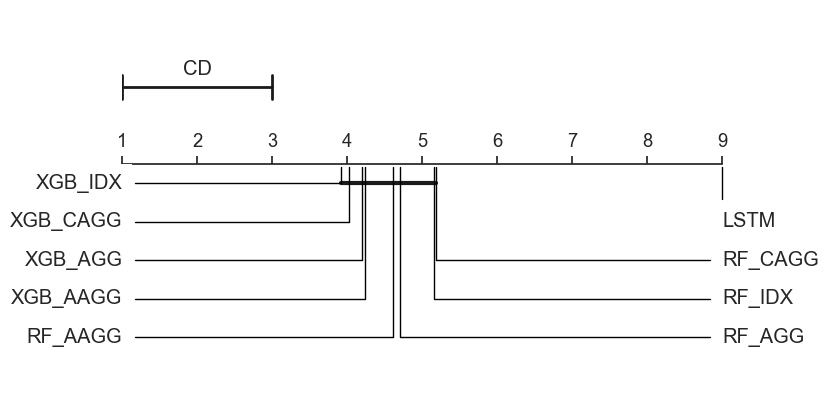

In [229]:
num_alg=len(approach_list)
num_runs=len(cl_list)

score_name=['Mean Value depending on case length']

friedmann_df=pd.DataFrame(data=None, index=approach_list, columns=cl_list)
i=0
for app in approach_list:
    friedmann_df.loc[app,:]=np.around(display_df_cl.loc[app,:].astype(float), decimals=4)

friedmann_rank=pd.DataFrame(data=None, index=approach_list)



for cl in cl_list:
    friedmann_temp=friedmann_df.loc[:,cl].sort_values( kind='mergesort', ascending=False).reset_index()
    friedmann_temp['rank_score_%s'%cl]=range(1,num_alg+1)
    friedmann_rank=friedmann_rank.join(friedmann_temp[['index','rank_score_%s'%cl]].set_index('index'))
    
    if len(set(friedmann_df.loc[:,cl]))==1:
        friedmann_rank['rank_score_%s'%cl]=5
    elif len(set(friedmann_df.loc[:,cl]))<9:
        temp_df=friedmann_df.loc[:,cl].value_counts().reset_index().sort_values(by='index', ascending=False).reset_index(drop=True)
        pre_count=0
        for i in range(len(temp_df)):
            value=temp_df.iloc[i,0]
            count=temp_df.iloc[i,1]
            rank=np.cumsum(range(count+1))[-1]/count+pre_count
            temp_alg_list=list(friedmann_df[friedmann_df.loc[:,cl]==value].loc[:,cl].reset_index()['index'])
            for alg in temp_alg_list:
                friedmann_rank.loc[alg,'rank_score_%s'%cl]=rank
                
            pre_count+=count


friedmann_rank_average=pd.DataFrame(data=None, index=approach_list, columns=['average_rank'])

for alg in approach_list:
    friedmann_rank_average.loc[alg,'average_rank']=np.mean(friedmann_rank.loc[alg])

nemenyi = np.array([friedmann_df.iloc[0],friedmann_df.iloc[1],friedmann_df.iloc[2],friedmann_df.iloc[3],friedmann_df.iloc[4],friedmann_df.iloc[5],friedmann_df.iloc[6],friedmann_df.iloc[7],friedmann_df.iloc[8]])

friedmann_stats=stats.friedmanchisquare(friedmann_df.iloc[0],friedmann_df.iloc[1],friedmann_df.iloc[2],friedmann_df.iloc[3],friedmann_df.iloc[4],friedmann_df.iloc[5],friedmann_df.iloc[6],friedmann_df.iloc[7],friedmann_df.iloc[8])
CD=2.728*(((num_alg*(num_alg+1))/(6*num_runs))**(1/2))

print(friedmann_stats)
print(CD)

sns.set(font_scale=1.2,rc={"lines.linewidth": 2, 'figure.figsize':(10,10), 'figure.dpi':100, 'xtick.top' : False, 'markers.fillstyle': 'full', "lines.markersize":9  })
sns.set_style("white")

sorted_friedmann=friedmann_rank_average.sort_values(by='average_rank').reset_index()

cd = CD


rank_1_value=sorted_friedmann.iloc[0,1]
rank_2_value=sorted_friedmann.iloc[1,1]
rank_3_value=sorted_friedmann.iloc[2,1]
rank_4_value=sorted_friedmann.iloc[3,1]
rank_5_value=sorted_friedmann.iloc[4,1]
rank_6_value=sorted_friedmann.iloc[5,1]
rank_7_value=sorted_friedmann.iloc[6,1]
rank_8_value=sorted_friedmann.iloc[7,1]
rank_9_value=sorted_friedmann.iloc[8,1]



rank_1=sorted_friedmann.iloc[0,0]
rank_2=sorted_friedmann.iloc[1,0]
rank_3=sorted_friedmann.iloc[2,0]
rank_4=sorted_friedmann.iloc[3,0]
rank_5=sorted_friedmann.iloc[4,0]
rank_6=sorted_friedmann.iloc[5,0]
rank_7=sorted_friedmann.iloc[6,0]
rank_8=sorted_friedmann.iloc[7,0]
rank_9=sorted_friedmann.iloc[8,0]


value_list=[rank_1_value,rank_2_value,rank_3_value,rank_4_value,rank_5_value,rank_6_value,rank_7_value,rank_8_value,rank_9_value]
rank_list=[rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9]

limits=(1,9)

fig, ax = plt.subplots(figsize=(10,5))
plt.subplots_adjust(left=0.2, right=0.8)


ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

ax.plot([limits[0],limits[0]+cd], [.8,.8], color="k")
ax.plot([limits[0],limits[0]], [.8-0.03,.8+0.03], color="k")
ax.plot([limits[0]+cd,limits[0]+cd], [.8-0.03,.8+0.03], color="k") 
ax.text(limits[0]+cd/2., 0.82, "CD", ha="center", va="bottom") 



bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.0)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90", color='black')
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")
ax.annotate(rank_1, xy=(rank_1_value, 0.6), xytext=(0,0.55),ha="right",  **kw)
ax.annotate(rank_2, xy=(rank_2_value, 0.6), xytext=(0,0.45),ha="right",  **kw)
ax.annotate(rank_3, xy=(rank_3_value, 0.6), xytext=(0,0.35),ha="right",  **kw)
ax.annotate(rank_4, xy=(rank_4_value, 0.6), xytext=(0,0.25),ha="right",  **kw)
ax.annotate(rank_5, xy=(rank_5_value, 0.6), xytext=(0,0.15),ha="right",  **kw)
ax.annotate(rank_6, xy=(rank_6_value, 0.6), xytext=(1.,0.15),ha="left",  **kw)
ax.annotate(rank_7, xy=(rank_7_value, 0.6), xytext=(1.,0.25),ha="left",  **kw)
ax.annotate(rank_8, xy=(rank_8_value, 0.6), xytext=(1.,0.35),ha="left",  **kw)
ax.annotate(rank_9, xy=(rank_9_value, 0.6), xytext=(1.,0.45),ha="left",  **kw)



k=0
row=0
for i in range(num_alg):
    value_idx=np.where((np.array(value_list[i:])<(value_list[i]+CD)))
    if ((len(value_idx[0]) > 0) & (k==0)):
        k=value_idx[0][-1]
        alg_1=value_list[i]
        alg_2=value_list[i+k]

        ax.plot([alg_1,alg_2],[0.55-(0.05*row),0.55-(0.05*row)], color="k", lw=3)
        row+=1
    k-=1
    if k<0:
        k=0

# plt.savefig('Nemenyi_Mean.jpg', bbox_inches='tight',dpi=1200)
# plt.savefig('Nemenyi_Mean.svg', bbox_inches='tight',dpi=1200)

FriedmanchisquareResult(statistic=158.6574712643678, pvalue=3.0523402438648356e-30)
1.9619638296781923


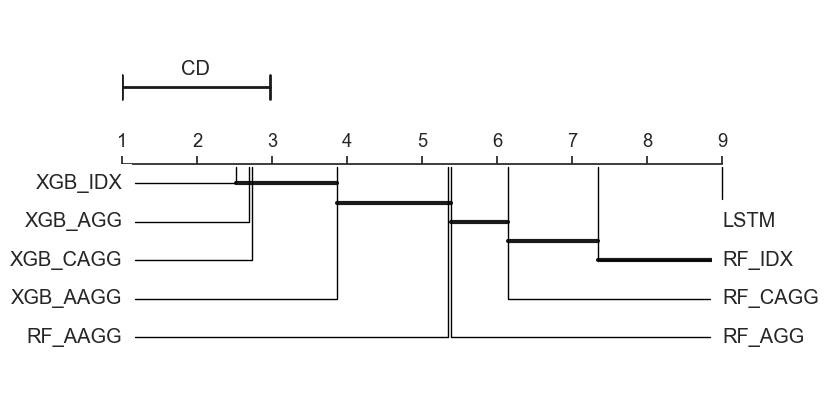

In [230]:
num_alg=len(approach_list)
num_runs=len(pp_list)

score_name=['Mean Value by prediction point , unweighted']

friedmann_df=pd.DataFrame(data=None, index=approach_list, columns=pp_list)
i=0
for app in approach_list:
    friedmann_df.loc[app,:]=np.around(display_df_pp.loc[app,:].astype(float), decimals=4)

friedmann_rank=pd.DataFrame(data=None, index=approach_list)



for cl in pp_list:
    friedmann_temp=friedmann_df.loc[:,cl].sort_values( kind='mergesort', ascending=False).reset_index()
    friedmann_temp['rank_score_%s'%cl]=range(1,num_alg+1)
    friedmann_rank=friedmann_rank.join(friedmann_temp[['index','rank_score_%s'%cl]].set_index('index'))
    
    if len(set(friedmann_df.loc[:,cl]))==1:
        friedmann_rank['rank_score_%s'%cl]=5
    elif len(set(friedmann_df.loc[:,cl]))<9:
        temp_df=friedmann_df.loc[:,cl].value_counts().reset_index().sort_values(by='index', ascending=False).reset_index(drop=True)
        pre_count=0
        for i in range(len(temp_df)):
            value=temp_df.iloc[i,0]
            count=temp_df.iloc[i,1]
            rank=np.cumsum(range(count+1))[-1]/count+pre_count
            temp_alg_list=list(friedmann_df[friedmann_df.loc[:,cl]==value].loc[:,cl].reset_index()['index'])
            for alg in temp_alg_list:
                friedmann_rank.loc[alg,'rank_score_%s'%cl]=rank
                
            pre_count+=count


friedmann_rank_average=pd.DataFrame(data=None, index=approach_list, columns=['average_rank'])

for alg in approach_list:
    friedmann_rank_average.loc[alg,'average_rank']=np.mean(friedmann_rank.loc[alg])

nemenyi = np.array([friedmann_df.iloc[0],friedmann_df.iloc[1],friedmann_df.iloc[2],friedmann_df.iloc[3],friedmann_df.iloc[4],friedmann_df.iloc[5],friedmann_df.iloc[6],friedmann_df.iloc[7],friedmann_df.iloc[8]])

friedmann_stats=stats.friedmanchisquare(friedmann_df.iloc[0],friedmann_df.iloc[1],friedmann_df.iloc[2],friedmann_df.iloc[3],friedmann_df.iloc[4],friedmann_df.iloc[5],friedmann_df.iloc[6],friedmann_df.iloc[7],friedmann_df.iloc[8])
CD=2.728*(((num_alg*(num_alg+1))/(6*num_runs))**(1/2))

print(friedmann_stats)
print(CD)

sns.set(font_scale=1.2,rc={"lines.linewidth": 2, 'figure.figsize':(10,10), 'figure.dpi':100, 'xtick.top' : False, 'markers.fillstyle': 'full', "lines.markersize":9  })
sns.set_style("white")

sorted_friedmann=friedmann_rank_average.sort_values(by='average_rank').reset_index()

cd = CD


rank_1_value=sorted_friedmann.iloc[0,1]
rank_2_value=sorted_friedmann.iloc[1,1]
rank_3_value=sorted_friedmann.iloc[2,1]
rank_4_value=sorted_friedmann.iloc[3,1]
rank_5_value=sorted_friedmann.iloc[4,1]
rank_6_value=sorted_friedmann.iloc[5,1]
rank_7_value=sorted_friedmann.iloc[6,1]
rank_8_value=sorted_friedmann.iloc[7,1]
rank_9_value=sorted_friedmann.iloc[8,1]



rank_1=sorted_friedmann.iloc[0,0]
rank_2=sorted_friedmann.iloc[1,0]
rank_3=sorted_friedmann.iloc[2,0]
rank_4=sorted_friedmann.iloc[3,0]
rank_5=sorted_friedmann.iloc[4,0]
rank_6=sorted_friedmann.iloc[5,0]
rank_7=sorted_friedmann.iloc[6,0]
rank_8=sorted_friedmann.iloc[7,0]
rank_9=sorted_friedmann.iloc[8,0]


value_list=[rank_1_value,rank_2_value,rank_3_value,rank_4_value,rank_5_value,rank_6_value,rank_7_value,rank_8_value,rank_9_value]
rank_list=[rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9]

limits=(1,9)

fig, ax = plt.subplots(figsize=(10,5))
plt.subplots_adjust(left=0.2, right=0.8)


ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

ax.plot([limits[0],limits[0]+cd], [.8,.8], color="k")
ax.plot([limits[0],limits[0]], [.8-0.03,.8+0.03], color="k")
ax.plot([limits[0]+cd,limits[0]+cd], [.8-0.03,.8+0.03], color="k") 
ax.text(limits[0]+cd/2., 0.82, "CD", ha="center", va="bottom") 



bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.0)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90", color='black')
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")
ax.annotate(rank_1, xy=(rank_1_value, 0.6), xytext=(0,0.55),ha="right",  **kw)
ax.annotate(rank_2, xy=(rank_2_value, 0.6), xytext=(0,0.45),ha="right",  **kw)
ax.annotate(rank_3, xy=(rank_3_value, 0.6), xytext=(0,0.35),ha="right",  **kw)
ax.annotate(rank_4, xy=(rank_4_value, 0.6), xytext=(0,0.25),ha="right",  **kw)
ax.annotate(rank_5, xy=(rank_5_value, 0.6), xytext=(0,0.15),ha="right",  **kw)
ax.annotate(rank_6, xy=(rank_6_value, 0.6), xytext=(1.,0.15),ha="left",  **kw)
ax.annotate(rank_7, xy=(rank_7_value, 0.6), xytext=(1.,0.25),ha="left",  **kw)
ax.annotate(rank_8, xy=(rank_8_value, 0.6), xytext=(1.,0.35),ha="left",  **kw)
ax.annotate(rank_9, xy=(rank_9_value, 0.6), xytext=(1.,0.45),ha="left",  **kw)



k=0
row=0
for i in range(num_alg):
    value_idx=np.where((np.array(value_list[i:])<(value_list[i]+CD)))
    if ((len(value_idx[0]) > 0) & (k==0)):
        k=value_idx[0][-1]
        alg_1=value_list[i]
        alg_2=value_list[i+k]

        ax.plot([alg_1,alg_2],[0.55-(0.05*row),0.55-(0.05*row)], color="k", lw=3)
        row+=1
    k-=1
    if k<0:
        k=0

# plt.savefig('Nemenyi_Mean.jpg', bbox_inches='tight',dpi=1200)
# plt.savefig('Nemenyi_Mean.svg', bbox_inches='tight',dpi=1200)

In [241]:
cl

'E 9'

FriedmanchisquareResult(statistic=161.5797643000862, pvalue=7.473839920484138e-31)
2.2309427418114924


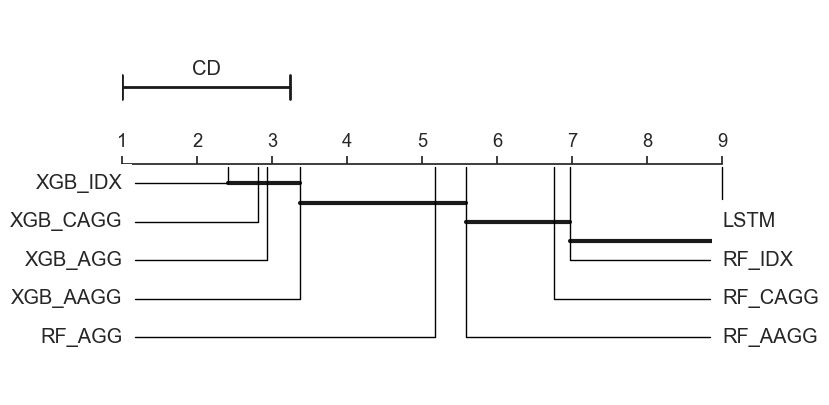

In [244]:
num_alg=len(approach_list)
num_runs=len(pp_list)

score_name=['Mean Value by prediction point, weighted']

friedmann_df=pd.DataFrame(data=None, index=approach_list, columns=pp_list)
i=0
for app in approach_list:
    friedmann_df.loc[app,:]=np.around(display_df_pp_w.loc[app,:].astype(float), decimals=4)

friedmann_rank=pd.DataFrame(data=None, index=approach_list)



for cl in pp_list:
    friedmann_temp=friedmann_df.loc[:,cl].sort_values( kind='mergesort', ascending=False).reset_index()
    friedmann_temp['rank_score_%s'%cl]=range(1,num_alg+1)
    friedmann_rank=friedmann_rank.join(friedmann_temp[['index','rank_score_%s'%cl]].set_index('index'))
    
    if len(set(friedmann_df.loc[:,cl]))==1:
        friedmann_rank['rank_score_%s'%cl]=5
    elif len(set(friedmann_df.loc[:,cl]))<9:
        temp_df=friedmann_df.loc[:,cl].value_counts().reset_index().sort_values(by='index', ascending=False).reset_index(drop=True)
        pre_count=0
        for i in range(len(temp_df)):
            value=temp_df.iloc[i,0]
            count=temp_df.iloc[i,1]
            rank=np.cumsum(range(count+1))[-1]/count+pre_count
            temp_alg_list=list(friedmann_df[friedmann_df.loc[:,cl]==value].loc[:,cl].reset_index()['index'])
            for alg in temp_alg_list:
                friedmann_rank.loc[alg,'rank_score_%s'%cl]=rank
                
            pre_count+=count


friedmann_rank_average=pd.DataFrame(data=None, index=approach_list, columns=['average_rank'])

for alg in approach_list:
    friedmann_rank_average.loc[alg,'average_rank']=np.mean(friedmann_rank.loc[alg])

nemenyi = np.array([friedmann_df.iloc[0],friedmann_df.iloc[1],friedmann_df.iloc[2],friedmann_df.iloc[3],friedmann_df.iloc[4],friedmann_df.iloc[5],friedmann_df.iloc[6],friedmann_df.iloc[7],friedmann_df.iloc[8]])

friedmann_stats=stats.friedmanchisquare(friedmann_df.iloc[0],friedmann_df.iloc[1],friedmann_df.iloc[2],friedmann_df.iloc[3],friedmann_df.iloc[4],friedmann_df.iloc[5],friedmann_df.iloc[6],friedmann_df.iloc[7],friedmann_df.iloc[8])
CD=3.102*(((num_alg*(num_alg+1))/(6*num_runs))**(1/2))

print(friedmann_stats)
print(CD)

sns.set(font_scale=1.2,rc={"lines.linewidth": 2, 'figure.figsize':(10,10), 'figure.dpi':100, 'xtick.top' : False, 'markers.fillstyle': 'full', "lines.markersize":9  })
sns.set_style("white")

sorted_friedmann=friedmann_rank_average.sort_values(by='average_rank').reset_index()

cd = CD


rank_1_value=sorted_friedmann.iloc[0,1]
rank_2_value=sorted_friedmann.iloc[1,1]
rank_3_value=sorted_friedmann.iloc[2,1]
rank_4_value=sorted_friedmann.iloc[3,1]
rank_5_value=sorted_friedmann.iloc[4,1]
rank_6_value=sorted_friedmann.iloc[5,1]
rank_7_value=sorted_friedmann.iloc[6,1]
rank_8_value=sorted_friedmann.iloc[7,1]
rank_9_value=sorted_friedmann.iloc[8,1]



rank_1=sorted_friedmann.iloc[0,0]
rank_2=sorted_friedmann.iloc[1,0]
rank_3=sorted_friedmann.iloc[2,0]
rank_4=sorted_friedmann.iloc[3,0]
rank_5=sorted_friedmann.iloc[4,0]
rank_6=sorted_friedmann.iloc[5,0]
rank_7=sorted_friedmann.iloc[6,0]
rank_8=sorted_friedmann.iloc[7,0]
rank_9=sorted_friedmann.iloc[8,0]


value_list=[rank_1_value,rank_2_value,rank_3_value,rank_4_value,rank_5_value,rank_6_value,rank_7_value,rank_8_value,rank_9_value]
rank_list=[rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9]

limits=(1,9)

fig, ax = plt.subplots(figsize=(10,5))
plt.subplots_adjust(left=0.2, right=0.8)


ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

ax.plot([limits[0],limits[0]+cd], [.8,.8], color="k")
ax.plot([limits[0],limits[0]], [.8-0.03,.8+0.03], color="k")
ax.plot([limits[0]+cd,limits[0]+cd], [.8-0.03,.8+0.03], color="k") 
ax.text(limits[0]+cd/2., 0.82, "CD", ha="center", va="bottom") 



bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.0)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90", color='black')
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")
ax.annotate(rank_1, xy=(rank_1_value, 0.6), xytext=(0,0.55),ha="right",  **kw)
ax.annotate(rank_2, xy=(rank_2_value, 0.6), xytext=(0,0.45),ha="right",  **kw)
ax.annotate(rank_3, xy=(rank_3_value, 0.6), xytext=(0,0.35),ha="right",  **kw)
ax.annotate(rank_4, xy=(rank_4_value, 0.6), xytext=(0,0.25),ha="right",  **kw)
ax.annotate(rank_5, xy=(rank_5_value, 0.6), xytext=(0,0.15),ha="right",  **kw)
ax.annotate(rank_6, xy=(rank_6_value, 0.6), xytext=(1.,0.15),ha="left",  **kw)
ax.annotate(rank_7, xy=(rank_7_value, 0.6), xytext=(1.,0.25),ha="left",  **kw)
ax.annotate(rank_8, xy=(rank_8_value, 0.6), xytext=(1.,0.35),ha="left",  **kw)
ax.annotate(rank_9, xy=(rank_9_value, 0.6), xytext=(1.,0.45),ha="left",  **kw)



k=0
row=0
for i in range(num_alg):
    value_idx=np.where((np.array(value_list[i:])<(value_list[i]+CD)))
    if ((len(value_idx[0]) > 0) & (k==0)):
        k=value_idx[0][-1]
        alg_1=value_list[i]
        alg_2=value_list[i+k]

        ax.plot([alg_1,alg_2],[0.55-(0.05*row),0.55-(0.05*row)], color="k", lw=3)
        row+=1
    k-=1
    if k<0:
        k=0

plt.savefig('Nemenyi_Mean.jpg', bbox_inches='tight',dpi=1200)
# plt.savefig('Nemenyi_Mean.svg', bbox_inches='tight',dpi=1200)

In [71]:
#Temporal Stability RF_AAGG


app_list_2=['_agg_base','_agg','_plus','_idx','_agg_base','_agg','_plus','_idx','_lstm']

collect_TS_df=pd.DataFrame(data=None, columns=['case length'])

for folder,app,colour in zip(app_list,app_list_2,palette):
    full_df=pd.DataFrame(data=None, columns=['case_length'])
    print(app)
    print(folder)
    for case_len in range (2,30):
        if ((app=='_lstm') & (case_len==26)):
            break
        else:
            for pred_point in range (1,case_len+1): 

                if pred_point==1:
                    file_read='Results/Results_Probs/{}/probs{}_{}_{}.csv'.format(folder,app,pred_point,case_len)
                    temp_df=pd.read_csv(file_read, header=None)
                    temp_df.columns=['pred_point_{}'.format(pred_point)]
                else:
                    file_read='Results/Results_Probs/{}/probs{}_{}_{}.csv'.format(folder,app,pred_point,case_len)
                    temp_df['pred_point_{}'.format(pred_point)]=pd.read_csv(file_read, header=None)

            temp_df['case_length']=case_len
            full_df=pd.concat([full_df,temp_df])
            
            del temp_df

    case_length_val=[]
    TS_val=[]
        
    for Ti in range(2,30):
        if ((app=='_lstm') & (Ti==26)):
            break
        else:
            temp_df=full_df[full_df['case_length']==Ti]
            n=len(temp_df)
            summed_diff=0
            for t in range(2,Ti+1):
                summed_diff+=sum(abs(temp_df['pred_point_{}'.format(t)]-temp_df['pred_point_{}'.format(t-1)]))
                #print(summed_diff)

            TS=1-(1/n)*(1/(Ti-1))*summed_diff
            case_length_val.append(Ti)
            TS_val.append(TS)

    TS_df=pd.DataFrame(data=TS_val, index=case_length_val, columns=['TS'])
    TS_df.reset_index(inplace=True)
    
    del TS_val, case_length_val, summed_diff
    
    sns.set(rc={'figure.figsize':(1.5,1.5), 'xtick.top' : False, 'figure.dpi':1200})
    sns.set_theme(style="whitegrid", rc={'grid.linewidth':0.2})
    plt.ticklabel_format(style='plain', axis='y')
    sns.set_context("paper")

    s=sns.barplot(data=TS_df, x='index', y='TS', color=colour, width=1)
    s.axes.set_title("{}".format(folder),fontsize=8)
    s.set(ylim=(0.5,1))   
    s.set_xlabel(None)
    s.set_ylabel(None)
    s.set(xticklabels=[])
    s.set(yticklabels=[])
#     s.tick_params(labelsize=5)
    #plt.legend()
    s.spines['left'].set_linewidth(0.5)
    s.spines['bottom'].set_linewidth(0.5)
    s.spines['top'].set_linewidth(0.5)
    s.spines['right'].set_linewidth(0.5)
#     s.set_xticks(range(2,30,4))

    
    collect_TS_df[folder]=TS_df['TS']
    collect_TS_df['case length']=range(2,30)
    plt.savefig('Temporal_stability_{}.svg'.format(folder), bbox_inches='tight',dpi=1200)
    plt.clf()


_agg_base
RF_AGG
_agg
RF_AAGG
_plus
RF_CAGG
_idx
RF_IDX
_agg_base
XGB_AGG
_agg
XGB_AAGG
_plus
XGB_CAGG
_idx
XGB_IDX
_lstm
LSTM


<Figure size 1800x1800 with 0 Axes>

In [67]:
collect_TS_df.set_index('case length', inplace=True)
weighted_TS_df=collect_TS_df.copy(deep=True)
weighted_sum_TS_df=collect_TS_df.copy(deep=True).head(1)
total=111340

for i in range(2,30):
    weighted_TS_df.loc[i]=collect_TS_df.loc[i]*case_length_no[i]/total
    
for col in weighted_TS_df.columns:
    weighted_sum_TS_df.loc[:,col]=weighted_TS_df.loc[:,col].sum()
    
weighted_sum_TS_df.reset_index(drop=True, inplace=True)

In [68]:
weighted_sum_TS_df.sort_values(by=0,axis=1,ascending=False, inplace=True)

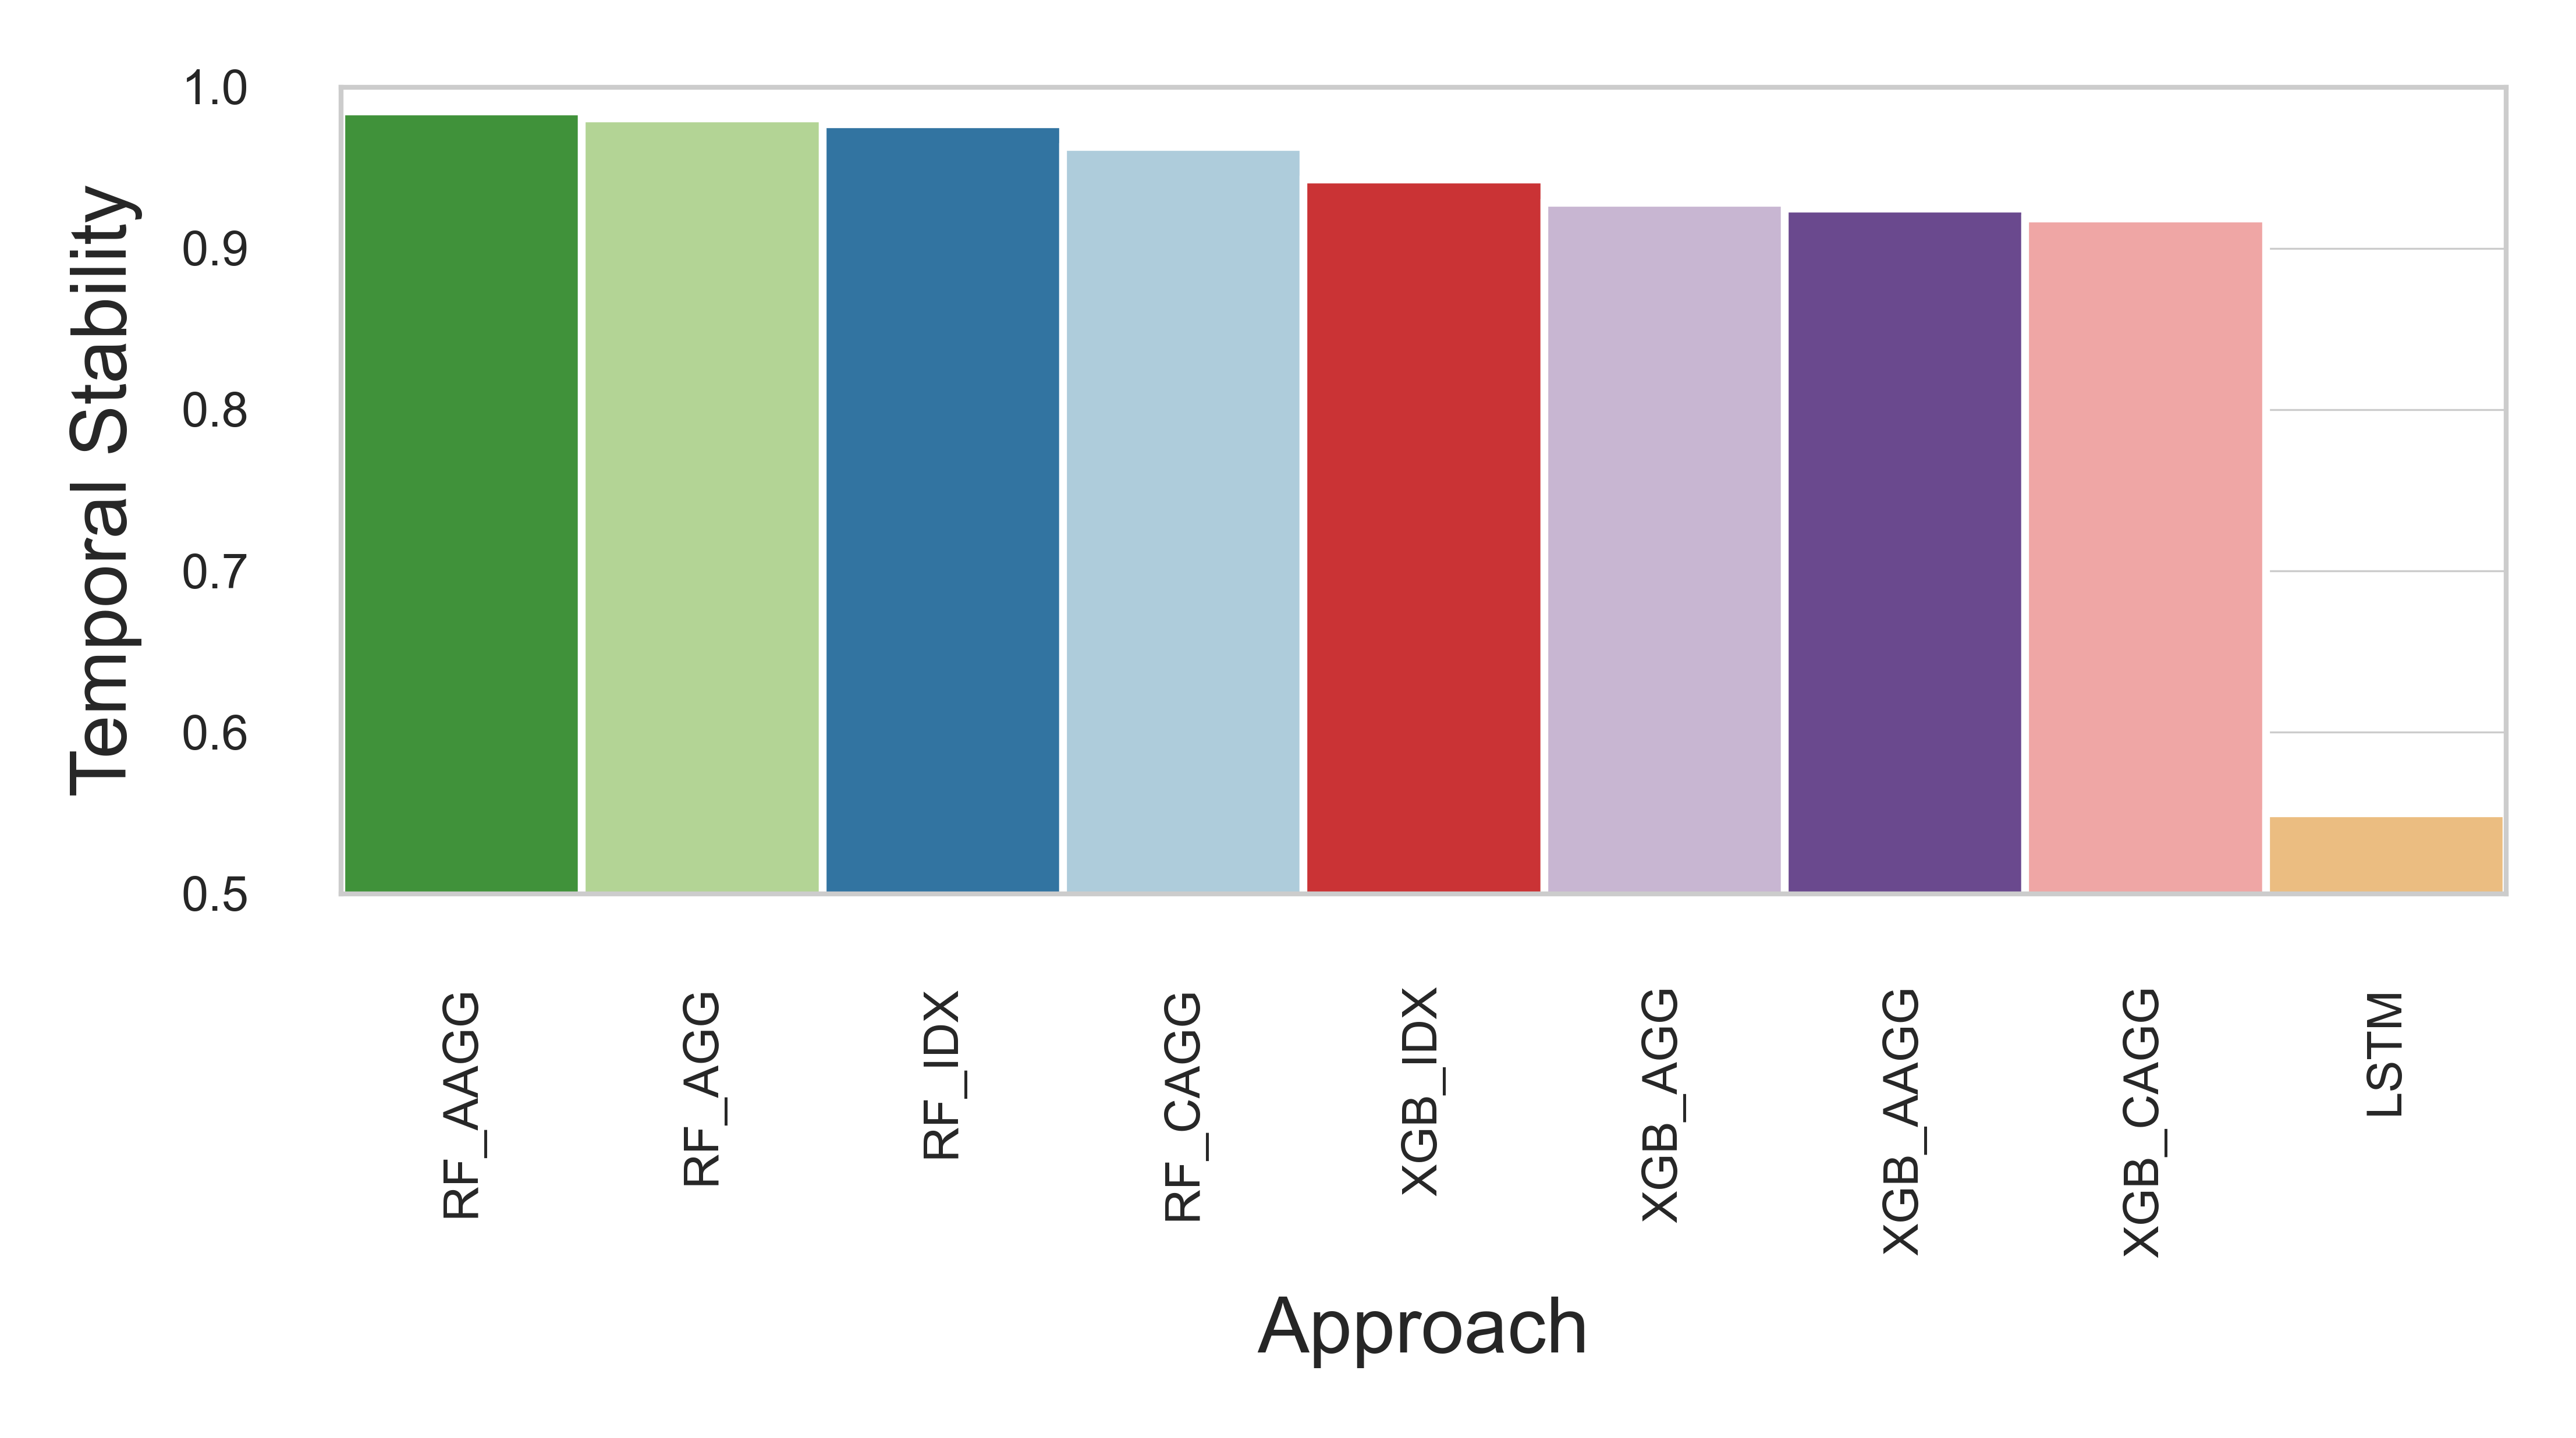

In [69]:




sns.set(rc={'figure.figsize':(4,1.5), 'xtick.top' : False, 'figure.dpi':1200})
sns.set_theme(style="whitegrid", rc={'grid.linewidth':0.2})
plt.ticklabel_format(style='plain', axis='y')
sns.set_palette(palette)
sns.set_context("paper")

s=sns.barplot(data=weighted_sum_TS_df, palette=palette2, width=1)


s.set(ylim=(0.5,1))
s.set_xlabel("Approach",fontsize=8)
s.set_ylabel("Temporal Stability",fontsize=8)
s.tick_params(labelsize=5)
#plt.legend()
s.spines['left'].set_linewidth(0.5)
s.spines['bottom'].set_linewidth(0.5)
s.spines['top'].set_linewidth(0.5)
s.spines['right'].set_linewidth(0.5)
plt.xticks(rotation=90)

plt.savefig('TS.svg',bbox_inches='tight')


In [40]:
palette2 = ['#33a02c','#b2df8a','#1f78b4','#a6cee3','#e31a1c','#cab2d6','#6a3d9a','#fb9a99','#fdbf6f']#'#ffff99','#ff7f00'

In [ ]:
approach_list=app_list
pp_list=list(range(2,30))

num_alg=len(approach_list)
num_runs=len(pp_list)

score_name=['Temporal Stability']

friedmann_df=pd.DataFrame(data=None, index=approach_list, columns=pp_list)
i=0
for app in approach_list:
    friedmann_df.loc[app,:]=np.around(collect_TS_df.loc[:,app].astype(float), decimals=4)

friedmann_rank=pd.DataFrame(data=None, index=approach_list)



for cl in pp_list:
    friedmann_temp=friedmann_df.loc[:,cl].sort_values( kind='mergesort', ascending=False).reset_index()
    friedmann_temp['rank_score_%s'%cl]=range(1,num_alg+1)
    friedmann_rank=friedmann_rank.join(friedmann_temp[['index','rank_score_%s'%cl]].set_index('index'))
    
    if len(set(friedmann_df.loc[:,cl]))==1:
        friedmann_rank['rank_score_%s'%cl]=5
    elif len(set(friedmann_df.loc[:,cl]))<9:
        temp_df=friedmann_df.loc[:,cl].value_counts().reset_index().sort_values(by='index',ascending=False).reset_index(drop=True)
        pre_count=0
        for i in range(len(temp_df)):
            value=temp_df.iloc[i,0]
            count=temp_df.iloc[i,1]
            rank=np.cumsum(range(count+1))[-1]/count+pre_count
            temp_alg_list=list(friedmann_df[friedmann_df.loc[:,cl]==value].loc[:,cl].reset_index()['index'])
            for alg in temp_alg_list:
                friedmann_rank.loc[alg,'rank_score_%s'%cl]=rank
                
            pre_count+=count


friedmann_rank_average=pd.DataFrame(data=None, index=approach_list, columns=['average_rank'])

for alg in approach_list:
    friedmann_rank_average.loc[alg,'average_rank']=np.mean(friedmann_rank.loc[alg])

nemenyi = np.array([friedmann_df.iloc[0],friedmann_df.iloc[1],friedmann_df.iloc[2],friedmann_df.iloc[3],friedmann_df.iloc[4],friedmann_df.iloc[5],friedmann_df.iloc[6],friedmann_df.iloc[7],friedmann_df.iloc[8]])

friedmann_stats=stats.friedmanchisquare(friedmann_df.iloc[0],friedmann_df.iloc[1],friedmann_df.iloc[2],friedmann_df.iloc[3],friedmann_df.iloc[4],friedmann_df.iloc[5],friedmann_df.iloc[6],friedmann_df.iloc[7],friedmann_df.iloc[8])
CD=2.728*(((num_alg*(num_alg+1))/(6*num_runs))**(1/2))

print(friedmann_stats)
print(CD)

sns.set(font_scale=1.2,rc={"lines.linewidth": 2, 'figure.figsize':(10,10), 'figure.dpi':100, 'xtick.top' : False, 'markers.fillstyle': 'full', "lines.markersize":9  })
sns.set_style("white")

sorted_friedmann=friedmann_rank_average.sort_values(by='average_rank').reset_index()

cd = CD


rank_1_value=sorted_friedmann.iloc[0,1]
rank_2_value=sorted_friedmann.iloc[1,1]
rank_3_value=sorted_friedmann.iloc[2,1]
rank_4_value=sorted_friedmann.iloc[3,1]
rank_5_value=sorted_friedmann.iloc[4,1]
rank_6_value=sorted_friedmann.iloc[5,1]
rank_7_value=sorted_friedmann.iloc[6,1]
rank_8_value=sorted_friedmann.iloc[7,1]
rank_9_value=sorted_friedmann.iloc[8,1]



rank_1=sorted_friedmann.iloc[0,0]
rank_2=sorted_friedmann.iloc[1,0]
rank_3=sorted_friedmann.iloc[2,0]
rank_4=sorted_friedmann.iloc[3,0]
rank_5=sorted_friedmann.iloc[4,0]
rank_6=sorted_friedmann.iloc[5,0]
rank_7=sorted_friedmann.iloc[6,0]
rank_8=sorted_friedmann.iloc[7,0]
rank_9=sorted_friedmann.iloc[8,0]


value_list=[rank_1_value,rank_2_value,rank_3_value,rank_4_value,rank_5_value,rank_6_value,rank_7_value,rank_8_value,rank_9_value]
rank_list=[rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9]

limits=(1,9)

fig, ax = plt.subplots(figsize=(10,5))
plt.subplots_adjust(left=0.2, right=0.8)


ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

ax.plot([limits[0],limits[0]+cd], [.8,.8], color="k")
ax.plot([limits[0],limits[0]], [.8-0.03,.8+0.03], color="k")
ax.plot([limits[0]+cd,limits[0]+cd], [.8-0.03,.8+0.03], color="k") 
ax.text(limits[0]+cd/2., 0.82, "CD", ha="center", va="bottom") 



bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.0)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90", color='black')
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")
ax.annotate(rank_1, xy=(rank_1_value, 0.6), xytext=(0,0.55),ha="right",  **kw)
ax.annotate(rank_2, xy=(rank_2_value, 0.6), xytext=(0,0.45),ha="right",  **kw)
ax.annotate(rank_3, xy=(rank_3_value, 0.6), xytext=(0,0.35),ha="right",  **kw)
ax.annotate(rank_4, xy=(rank_4_value, 0.6), xytext=(0,0.25),ha="right",  **kw)
ax.annotate(rank_5, xy=(rank_5_value, 0.6), xytext=(0,0.15),ha="right",  **kw)
ax.annotate(rank_6, xy=(rank_6_value, 0.6), xytext=(1.,0.15),ha="left",  **kw)
ax.annotate(rank_7, xy=(rank_7_value, 0.6), xytext=(1.,0.25),ha="left",  **kw)
ax.annotate(rank_8, xy=(rank_8_value, 0.6), xytext=(1.,0.35),ha="left",  **kw)
ax.annotate(rank_9, xy=(rank_9_value, 0.6), xytext=(1.,0.45),ha="left",  **kw)



k=0
row=0
for i in range(num_alg):
    value_idx=np.where((np.array(value_list[i:])<(value_list[i]+CD)))
    if ((len(value_idx[0]) > 0) & (k==0)):
        k=value_idx[0][-1]
        alg_1=value_list[i]
        alg_2=value_list[i+k]

        ax.plot([alg_1,alg_2],[0.55-(0.05*row),0.55-(0.05*row)], color="k", lw=3)
        row+=1
    k-=1
    if k<0:
        k=0

# plt.savefig('Nemenyi_Mean.jpg', bbox_inches='tight',dpi=1200)
# plt.savefig('Nemenyi_Mean.svg', bbox_inches='tight',dpi=1200)

In [ ]:
friedmann_df

In [ ]:
#Temporal Stability RF_AAGG
full_df=pd.DataFrame(data=None, columns=['case_length'])
folder='RF_AGG'

for case_len in range (2,30):

    for pred_point in range (1,case_len+1): 
        
        if pred_point==1:
            file_read='Results/Results_Probs/{}/probs_agg_base_{}_{}.csv'.format(folder, pred_point,case_len)
            temp_df=pd.read_csv(file_read, header=None)
            temp_df.columns=['pred_point_{}'.format(pred_point)]
        else:
            file_read='Results/Results_Probs/{}/probs_agg_base_{}_{}.csv'.format(folder, pred_point,case_len)
            temp_df['pred_point_{}'.format(pred_point)]=pd.read_csv(file_read, header=None)
            
    temp_df['case_length']=case_len
    full_df=pd.concat([full_df,temp_df])
        
tot=0
for i in range(2,30):
    tot+=len(full_df[full_df['case_length']==i])

case_length_val=[]
TS_val=[]
for Ti in range(2,30):
    temp_df=full_df[full_df['case_length']==Ti]
    n=len(temp_df)
    summed_diff=0
    for t in range(2,Ti+1):
        summed_diff+=sum(abs(temp_df['pred_point_{}'.format(t)]-temp_df['pred_point_{}'.format(t-1)]))
#         print(summed_diff)
        
    TS=1-(1/n)*(1/(Ti-1))*summed_diff
    case_length_val.append(Ti)
    TS_val.append(TS)

TS_df=pd.DataFrame(data=TS_val, index=case_length_val, columns=['TS'])
TS_df.reset_index(inplace=True)

s=sns.barplot(data=TS_df, x='index', y='TS', palette='dark:b')
s.set(ylim=(0.5,1))
s.set(xlabel='case length')
plt.savefig('Temporal_stability_{}.jpg'.format(folder), bbox_inches='tight',dpi=300)

In [ ]:
## Temporal Stability LSTM Network??
full_df=pd.DataFrame(data=None, columns=['case_length'])

for case_len in range (2,25):

    for pred_point in range (1,case_len+1): 
        
        if pred_point==1:
            file_read='Results/Results_Probs_LSTM/probs_lstm_{}_{}.csv'.format(pred_point,case_len)
            temp_df=pd.read_csv(file_read, header=None)
            temp_df.columns=['pred_point_{}'.format(pred_point)]
        else:
            file_read='Results/Results_Probs_LSTM/probs_lstm_{}_{}.csv'.format(pred_point,case_len)
            temp_df['pred_point_{}'.format(pred_point)]=pd.read_csv(file_read, header=None)
            
    temp_df['case_length']=case_len
    full_df=pd.concat([full_df,temp_df])
        
tot=0
for i in range(2,30):
    tot+=len(full_df[full_df['case_length']==i])
    
case_length_val=[]
TS_val=[]
for Ti in range(2,25):
    temp_df=full_df[full_df['case_length']==Ti]
    n=len(temp_df)
    summed_diff=0
    for t in range(2,Ti+1):
        summed_diff+=sum(abs(temp_df['pred_point_{}'.format(t)]-temp_df['pred_point_{}'.format(t-1)]))
#         print(summed_diff)
        
    TS=1-(1/n)*(1/(Ti-1))*summed_diff
    case_length_val.append(Ti)
    TS_val.append(TS)

TS_df=pd.DataFrame(data=TS_val, index=case_length_val, columns=['TS'])
TS_df.reset_index(inplace=True)

s=sns.barplot(data=TS_df, x='index', y='TS', palette='dark:b')
s.set(ylim=(0.5,1))
s.set(xlabel='case length')

In [ ]:
file_read='Results/probs_full.csv'.format(pred_point,case_len)
full_df=pd.read_csv(file_read, header=None)

columns=['case_length']
for i in range(1,30):
    columns.append('pred_point_{}'.format(i))
    
full_df.columns=columns

In [ ]:
case_length_val=[]
TS_val=[]
for Ti in range(2,30):
    temp_df=full_df[full_df['case_length']==Ti]
    n=len(temp_df)
    summed_diff=0
    for t in range(2,Ti+1):
        summed_diff+=sum(abs(temp_df['pred_point_{}'.format(t)]-temp_df['pred_point_{}'.format(t-1)]))
#         print(summed_diff)
        
    TS=1-(1/n)*(1/(Ti-1))*summed_diff
    print(TS, Ti)
    case_length_val.append(Ti)
    TS_val.append(TS)

TS_df=pd.DataFrame(data=TS_val, index=case_length_val, columns=['TS'])
TS_df.reset_index(inplace=True)

In [ ]:
s=sns.barplot(data=TS_df, x='index', y='TS', palette='dark:b')
s.set(ylim=(0.9,1))
s.set(xlabel='case length')


In [ ]:
for Ti in range(2,30):
    temp_df=full_df[full_df['case_length']==Ti]
    n=len(temp_df)
    summed_diff=0
    summed_diff=sum(abs(temp_df['pred_point_{}'.format(Ti)]-temp_df['pred_point_1'.format(t-1)]))
#         print(summed_diff)
        
    TS=1-(1/n)*(1/(2-1))*summed_diff
    print(TS, Ti)

In [ ]:
for Ti in range(2,30):
    temp_df=full_df[full_df['case_length']>=Ti]
    n=len(temp_df)
    summed_diff=0
    summed_diff=sum(abs(temp_df['pred_point_{}'.format(Ti)]-temp_df['pred_point_1'.format(t-1)]))
#         print(summed_diff)
        
    TS=1-(1/n)*(1/(2-1))*summed_diff
    print(TS, Ti)



In [ ]:
full_df[full_df['case_length']==25].reset_index(drop=True)

In [ ]:
display_df=full_df[full_df['case_length']==10].reset_index(drop=True)
display_df=display_df.loc[[1,5,10,50,100,150]].drop('case_length', axis=1)
display_df.reset_index(inplace=True,drop=True)
display_df=display_df.loc[:,:'pred_point_10']

In [ ]:
sns.set(font_scale=0.5,rc={'figure.figsize':((5),(5)), "lines.linewidth": 2, 'figure.dpi':600, 'xtick.top' : False, 'markers.fillstyle': 'full', "lines.markersize":4,'lines.markeredgewidth':0 })
sns.set_style("whitegrid")

s=sns.lineplot(data=display_df.T,legend='brief', palette='viridis',ci=None)
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', borderaxespad=0)
plt.xticks(rotation=90)
s.set(ylabel='Prediction score')
s.set(xlabel='Prediction Point')
s.set(ylim=(0,1))

# s.set(xlim=(1,31))

In [75]:
static_list=['building_phase_pulk', 'is_launch', 'pte_derivative', 'manufacturer_country', 'pte_plant',
             'Assessed_Manufacturer_Experience', 'unique_id_count', 'has_ldl', 'pte_plant_count',
             'create->ctp', 'create->po_plan', 'create->earliestzet', 'part_number_after_count',
             'create->goods_receipt', 'create->cf', 'create->latestzet', 'create->zet', 'is_intervall',
             'change_type', 'no_derivates', 'manufacturer_number_count', 'severity_index', 'context_type',
             'steering_level', 'set_status_90_frequency', 'has_pqm', 'has_ldlnafta', 'has_gams', 'is_admin_only',
             'component', 'has_precursor', 'pkr_relevant', 'first_clearance', 'i_step', 'pn_relevant', 'gwk',
            ]

In [44]:
palette

['#b2df8a',
 '#33a02c',
 '#a6cee3',
 '#1f78b4',
 '#cab2d6',
 '#6a3d9a',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f']

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:81: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  short_df=full_df.groupby(['Type','Prediction Point'],as_index=False, sort=False).sum()
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:89: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=short_df.groupby('Prediction Point',as_index=False, sort=False).sum()
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:81: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  short_df=full_df.groupby(['Type','Prediction Point'],as_index=False, sort=False).sum()
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:89: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=short_df.groupby('Prediction Point',as_index=False, sort=False).sum()
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:81: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  short_df=full_df.groupby(['Type','Prediction Point'],as_index=False, sort=False).sum()
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:89: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total=short_df.groupby('Prediction Point',as_index=False, sort=False).sum()
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppData\Local\Temp\ipykernel_16196\3106011177.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)
C:\Users\Q618373\AppDa

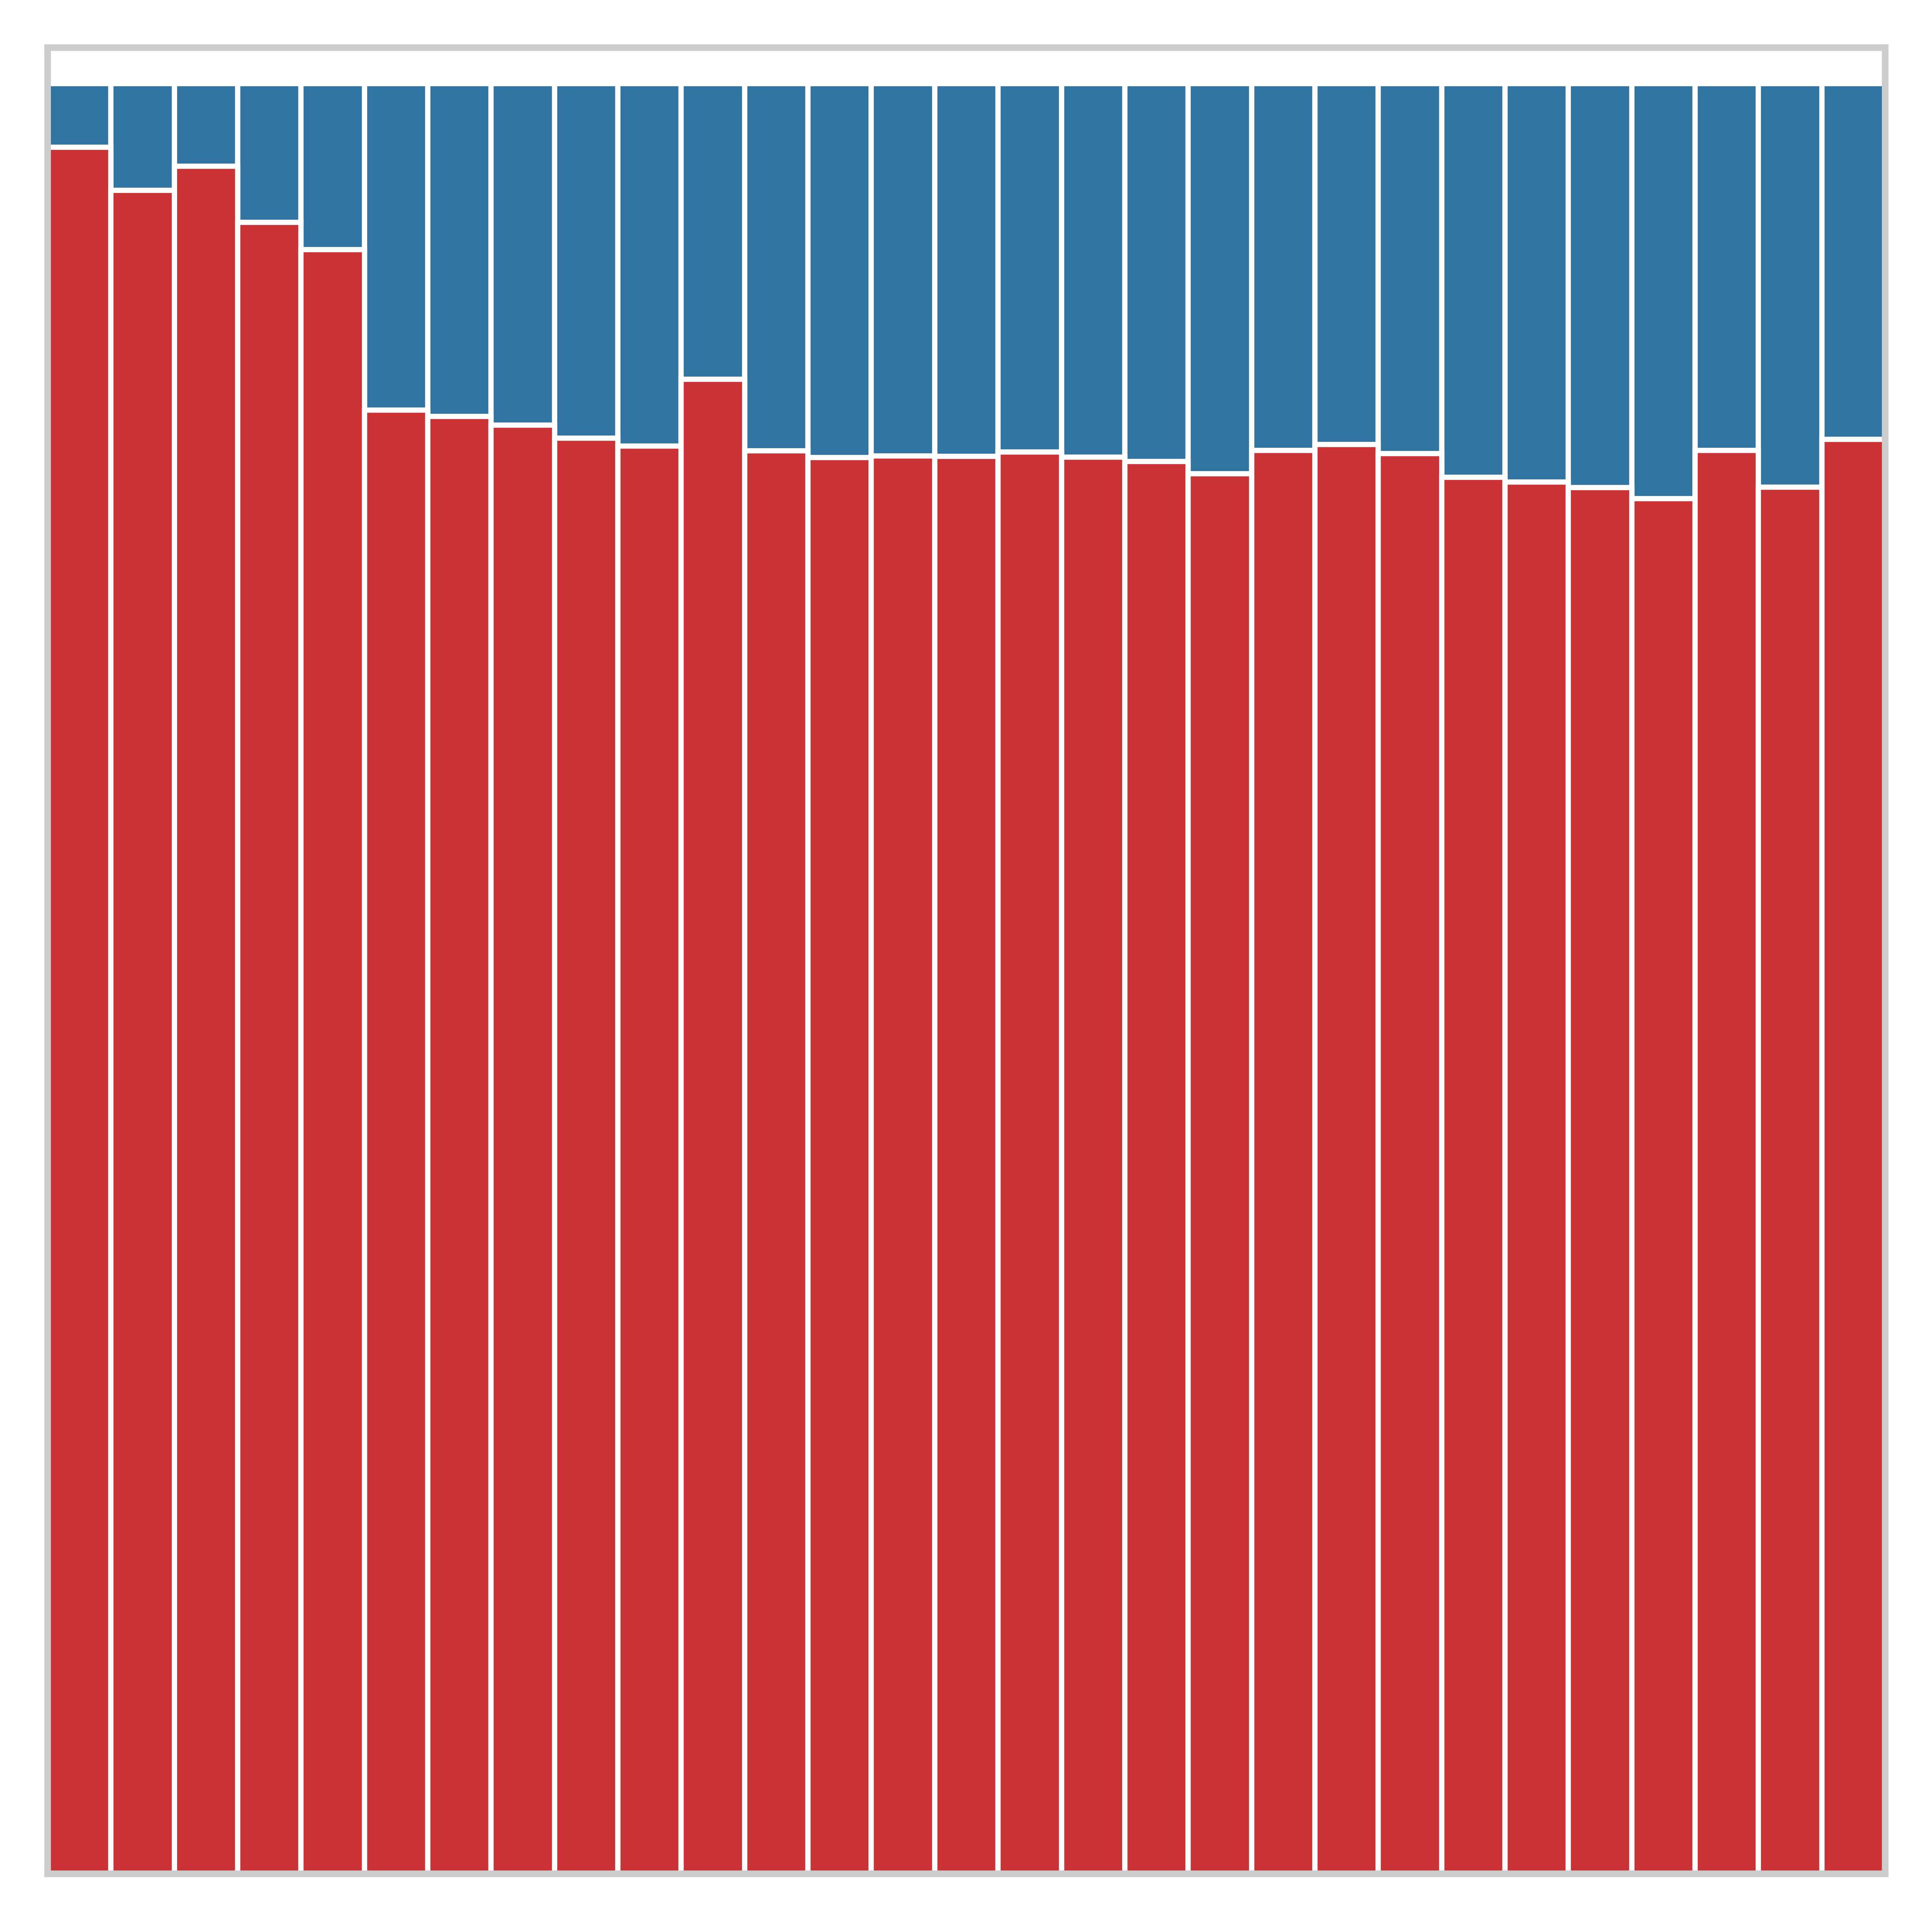

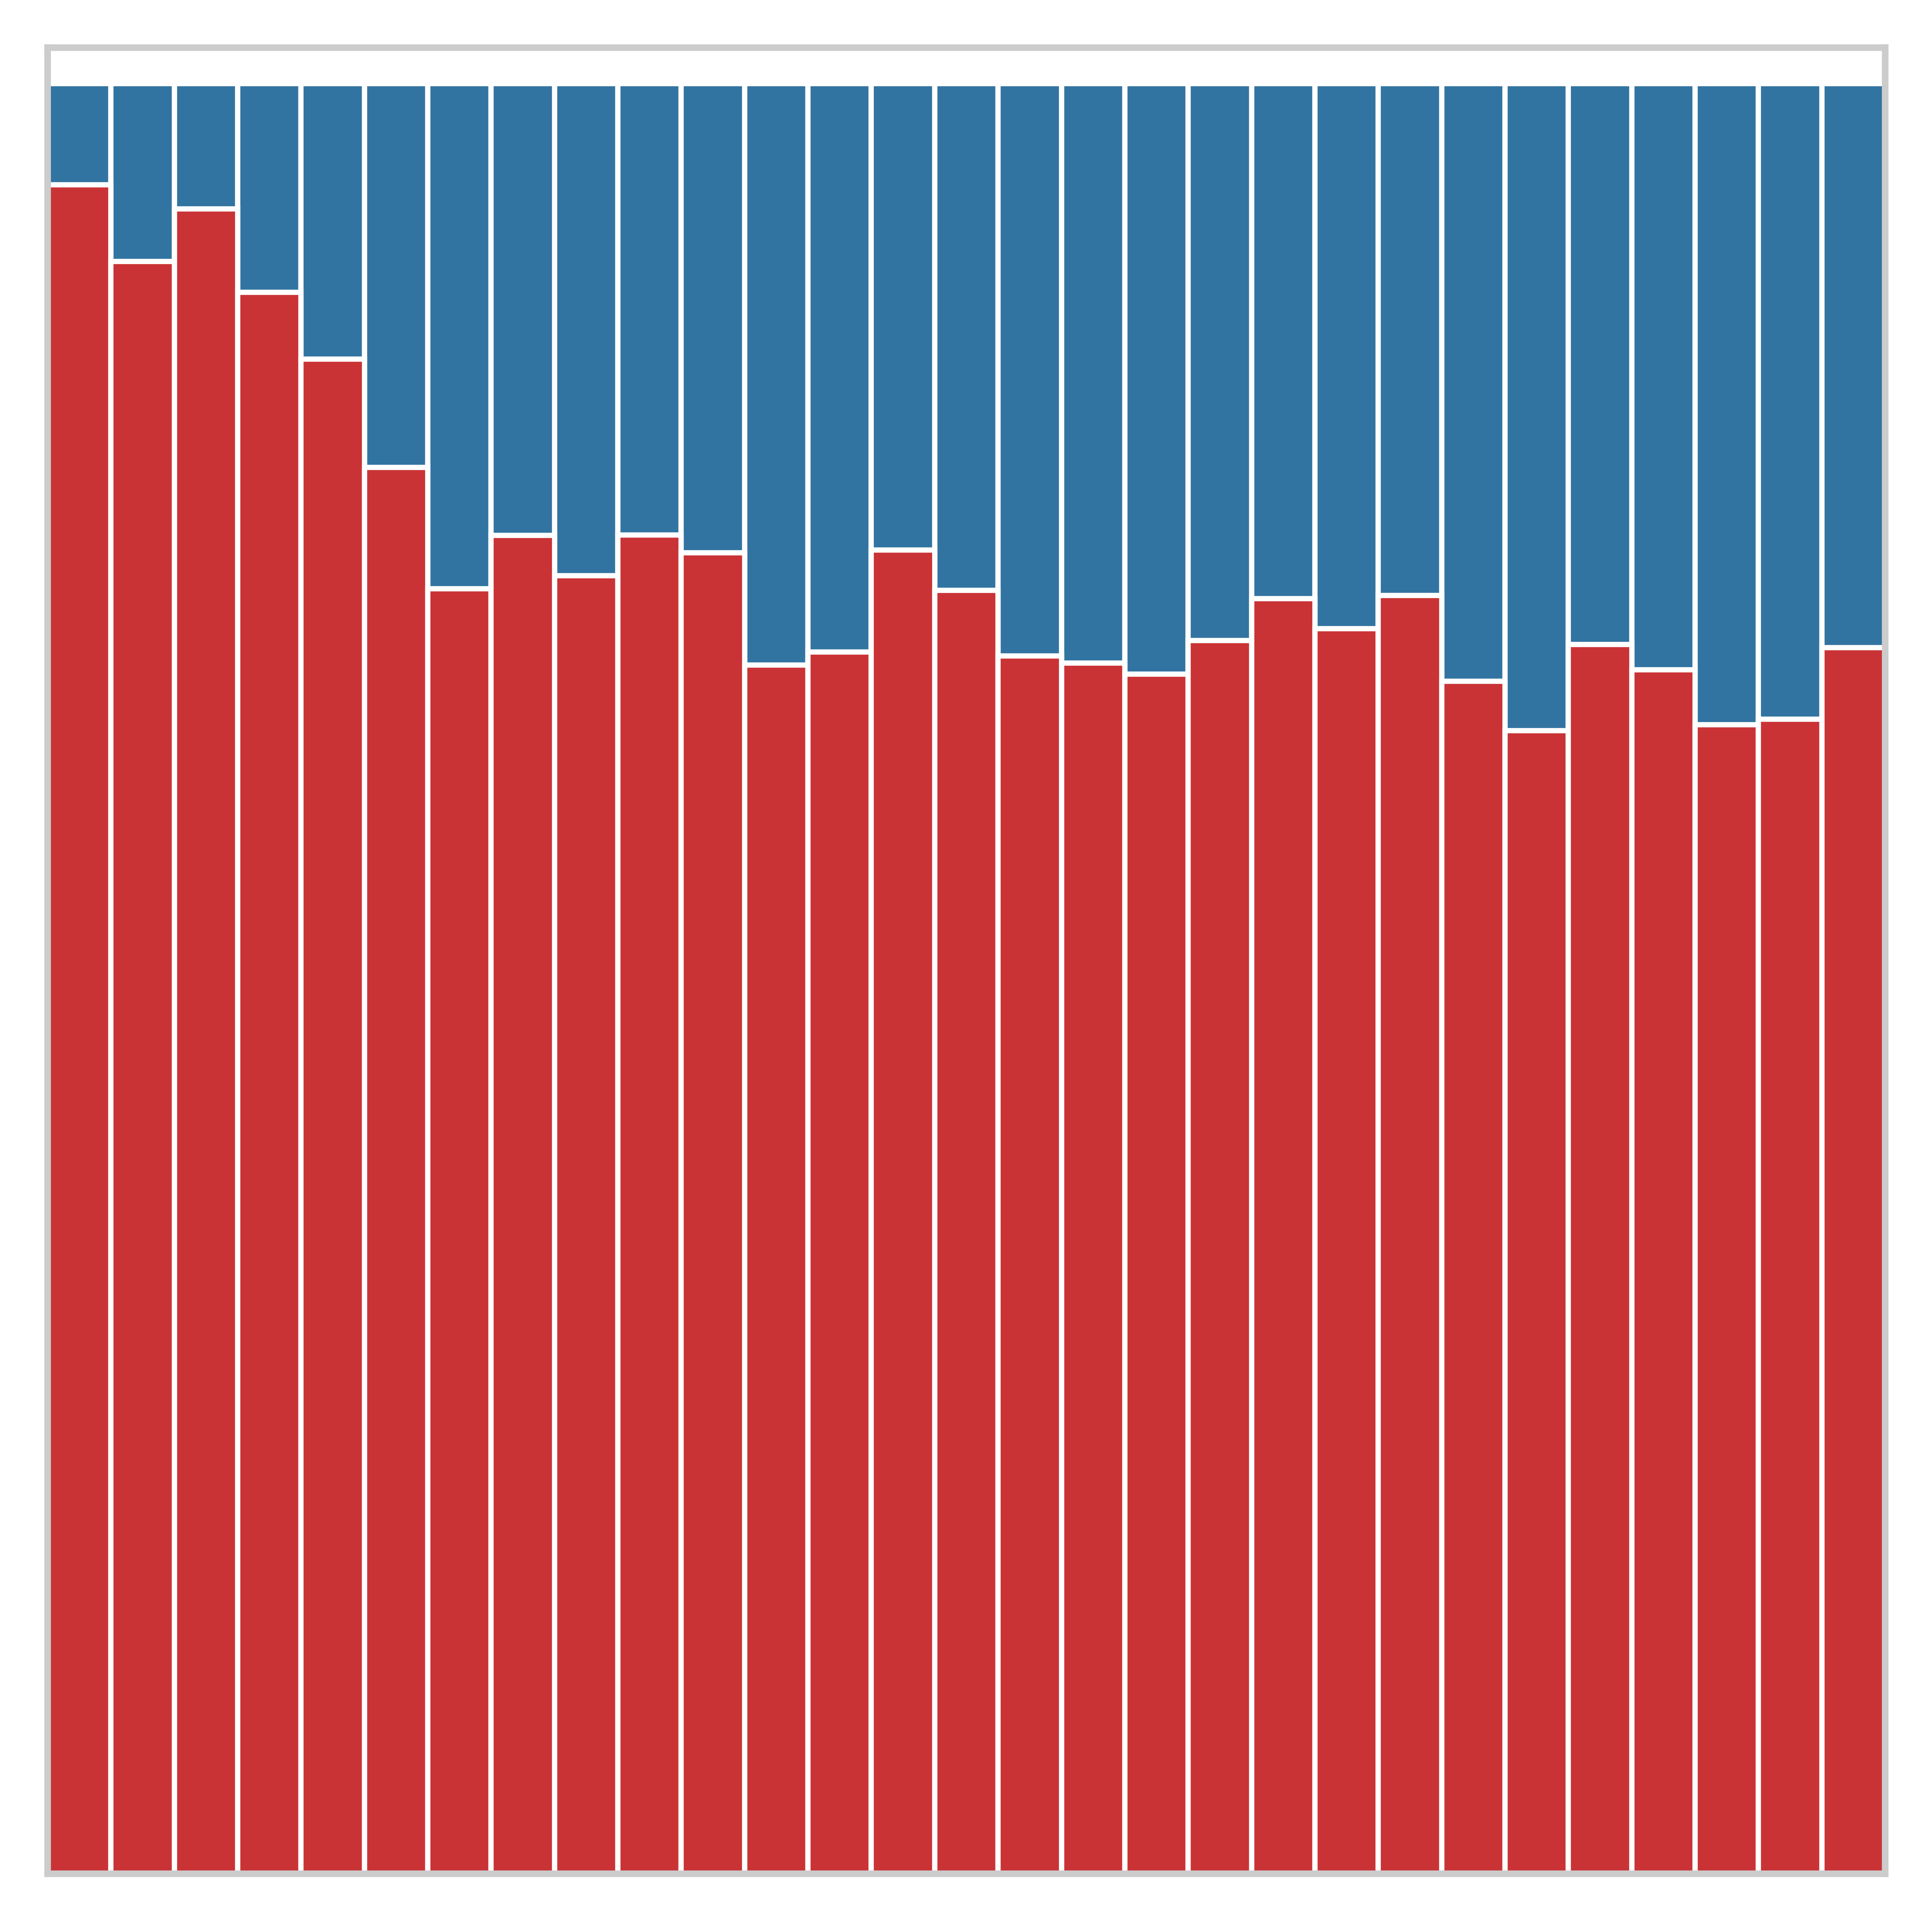

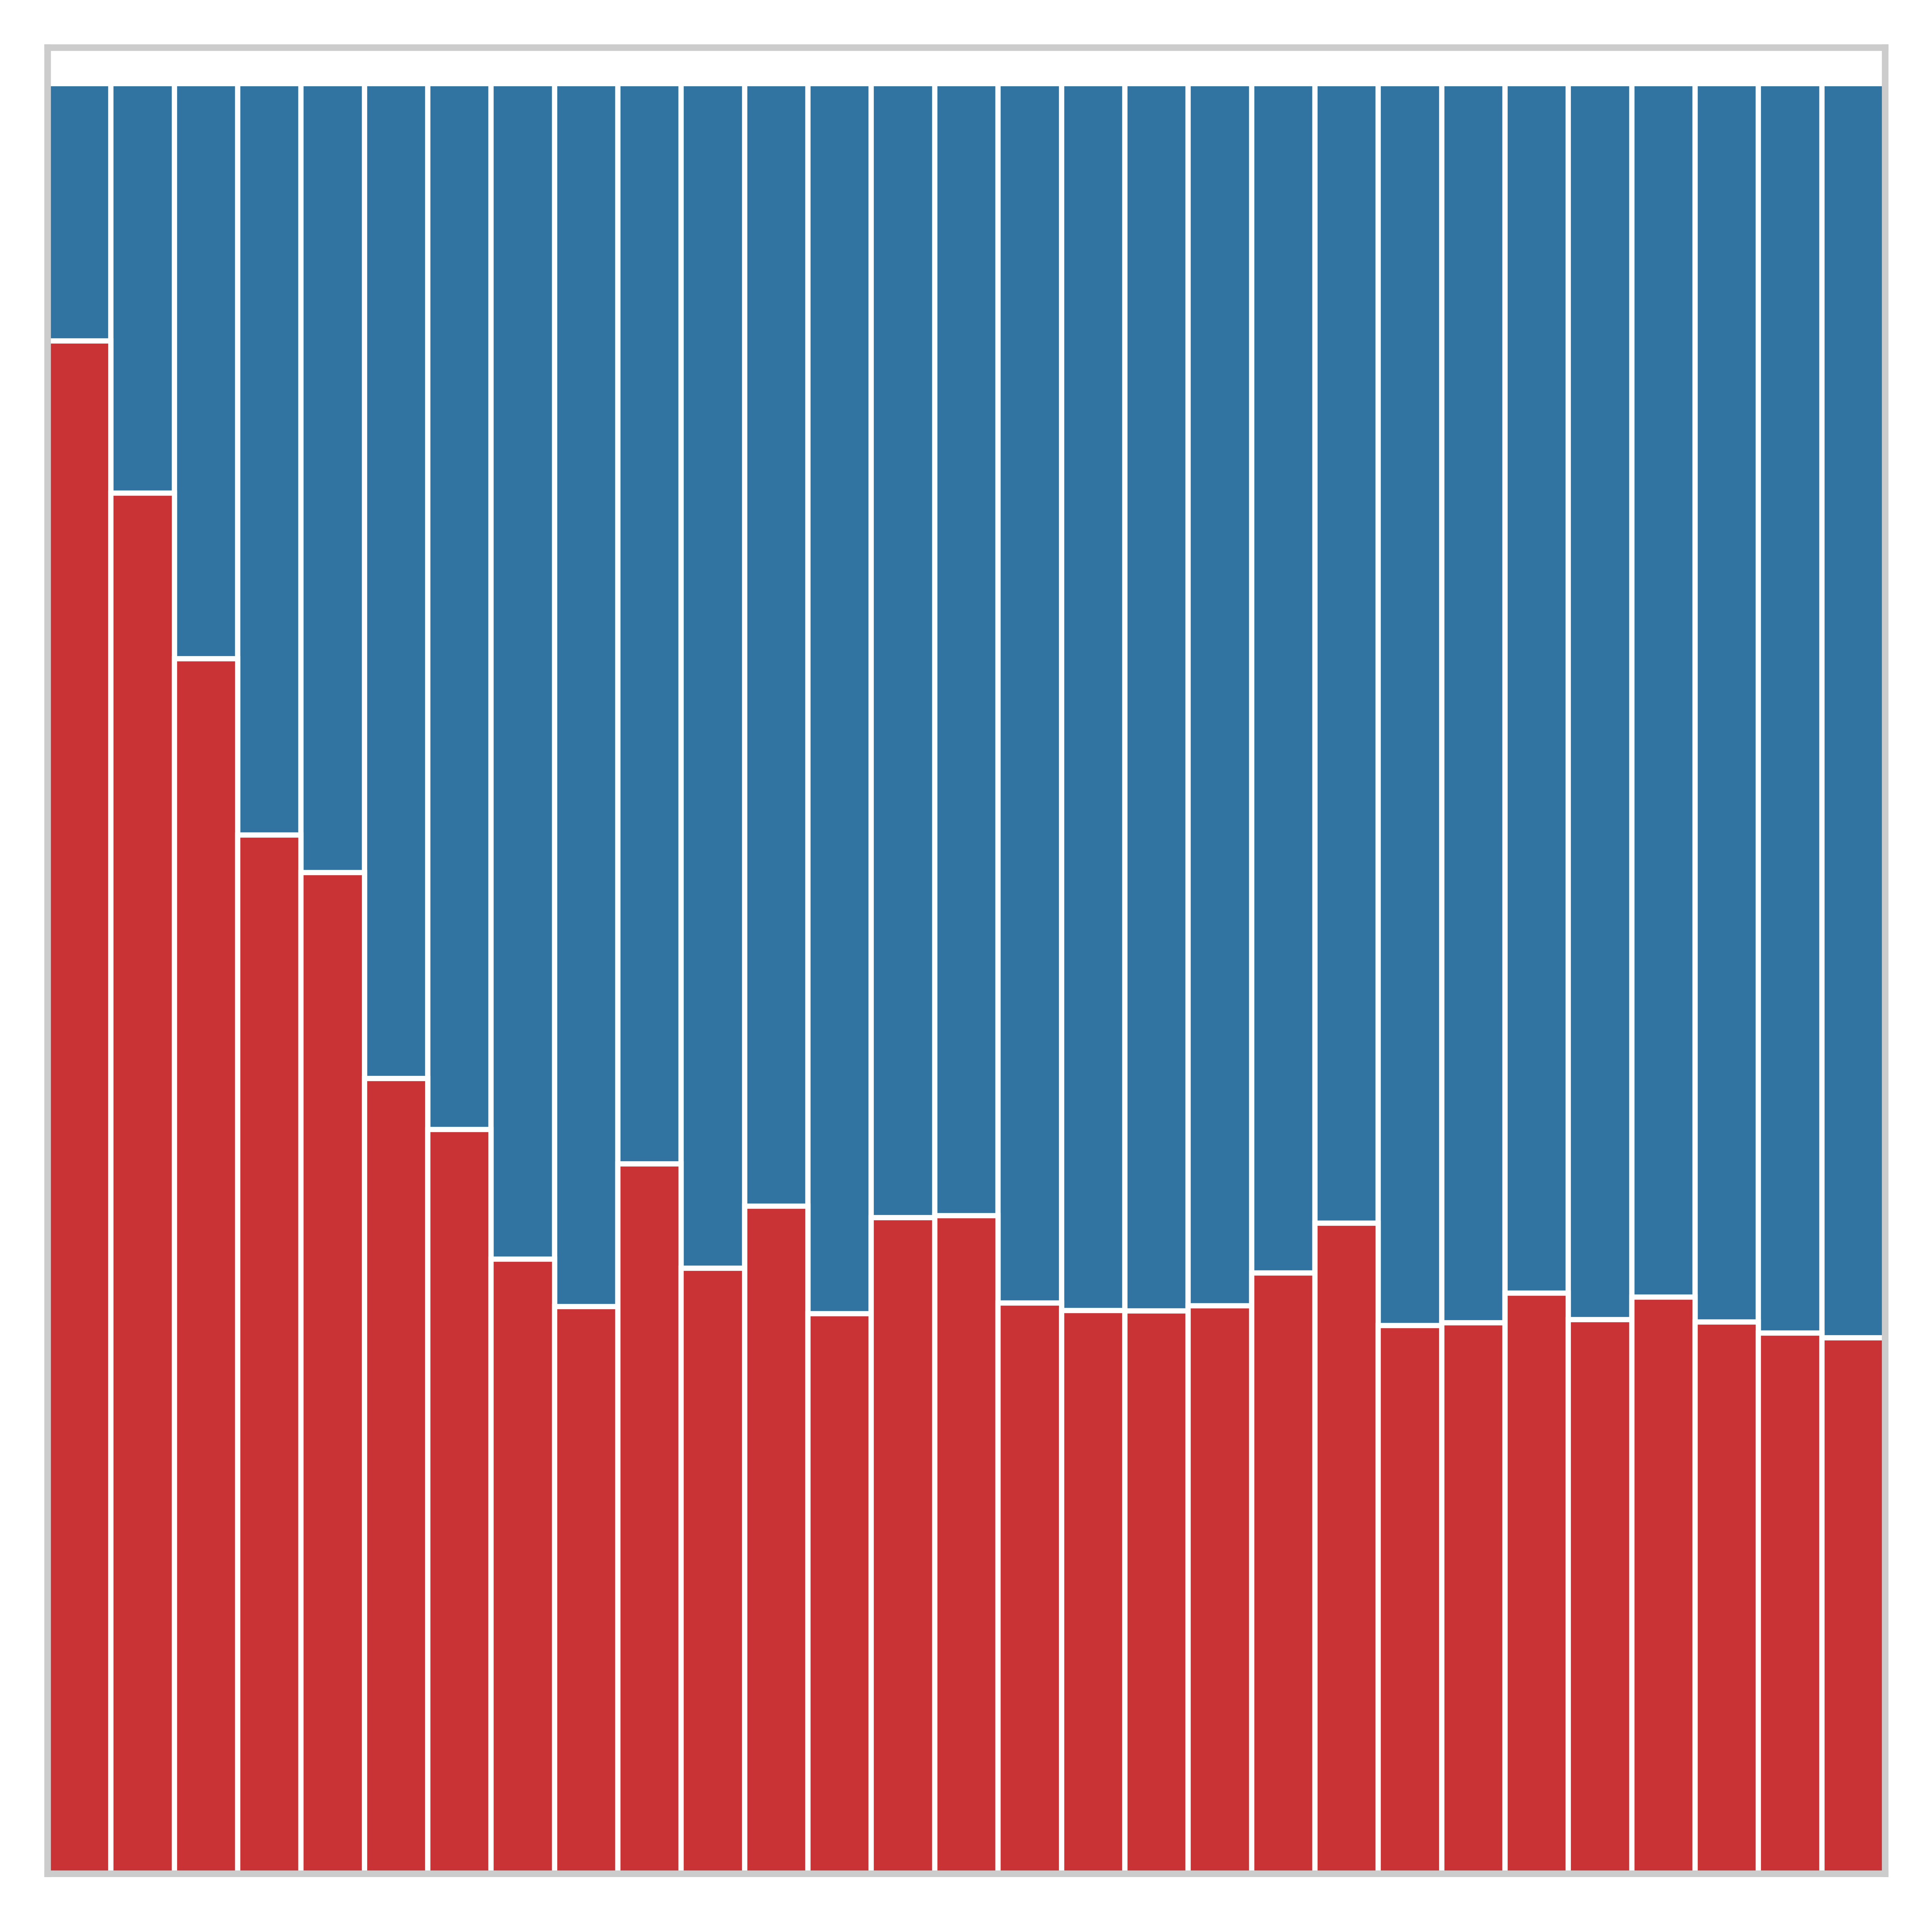

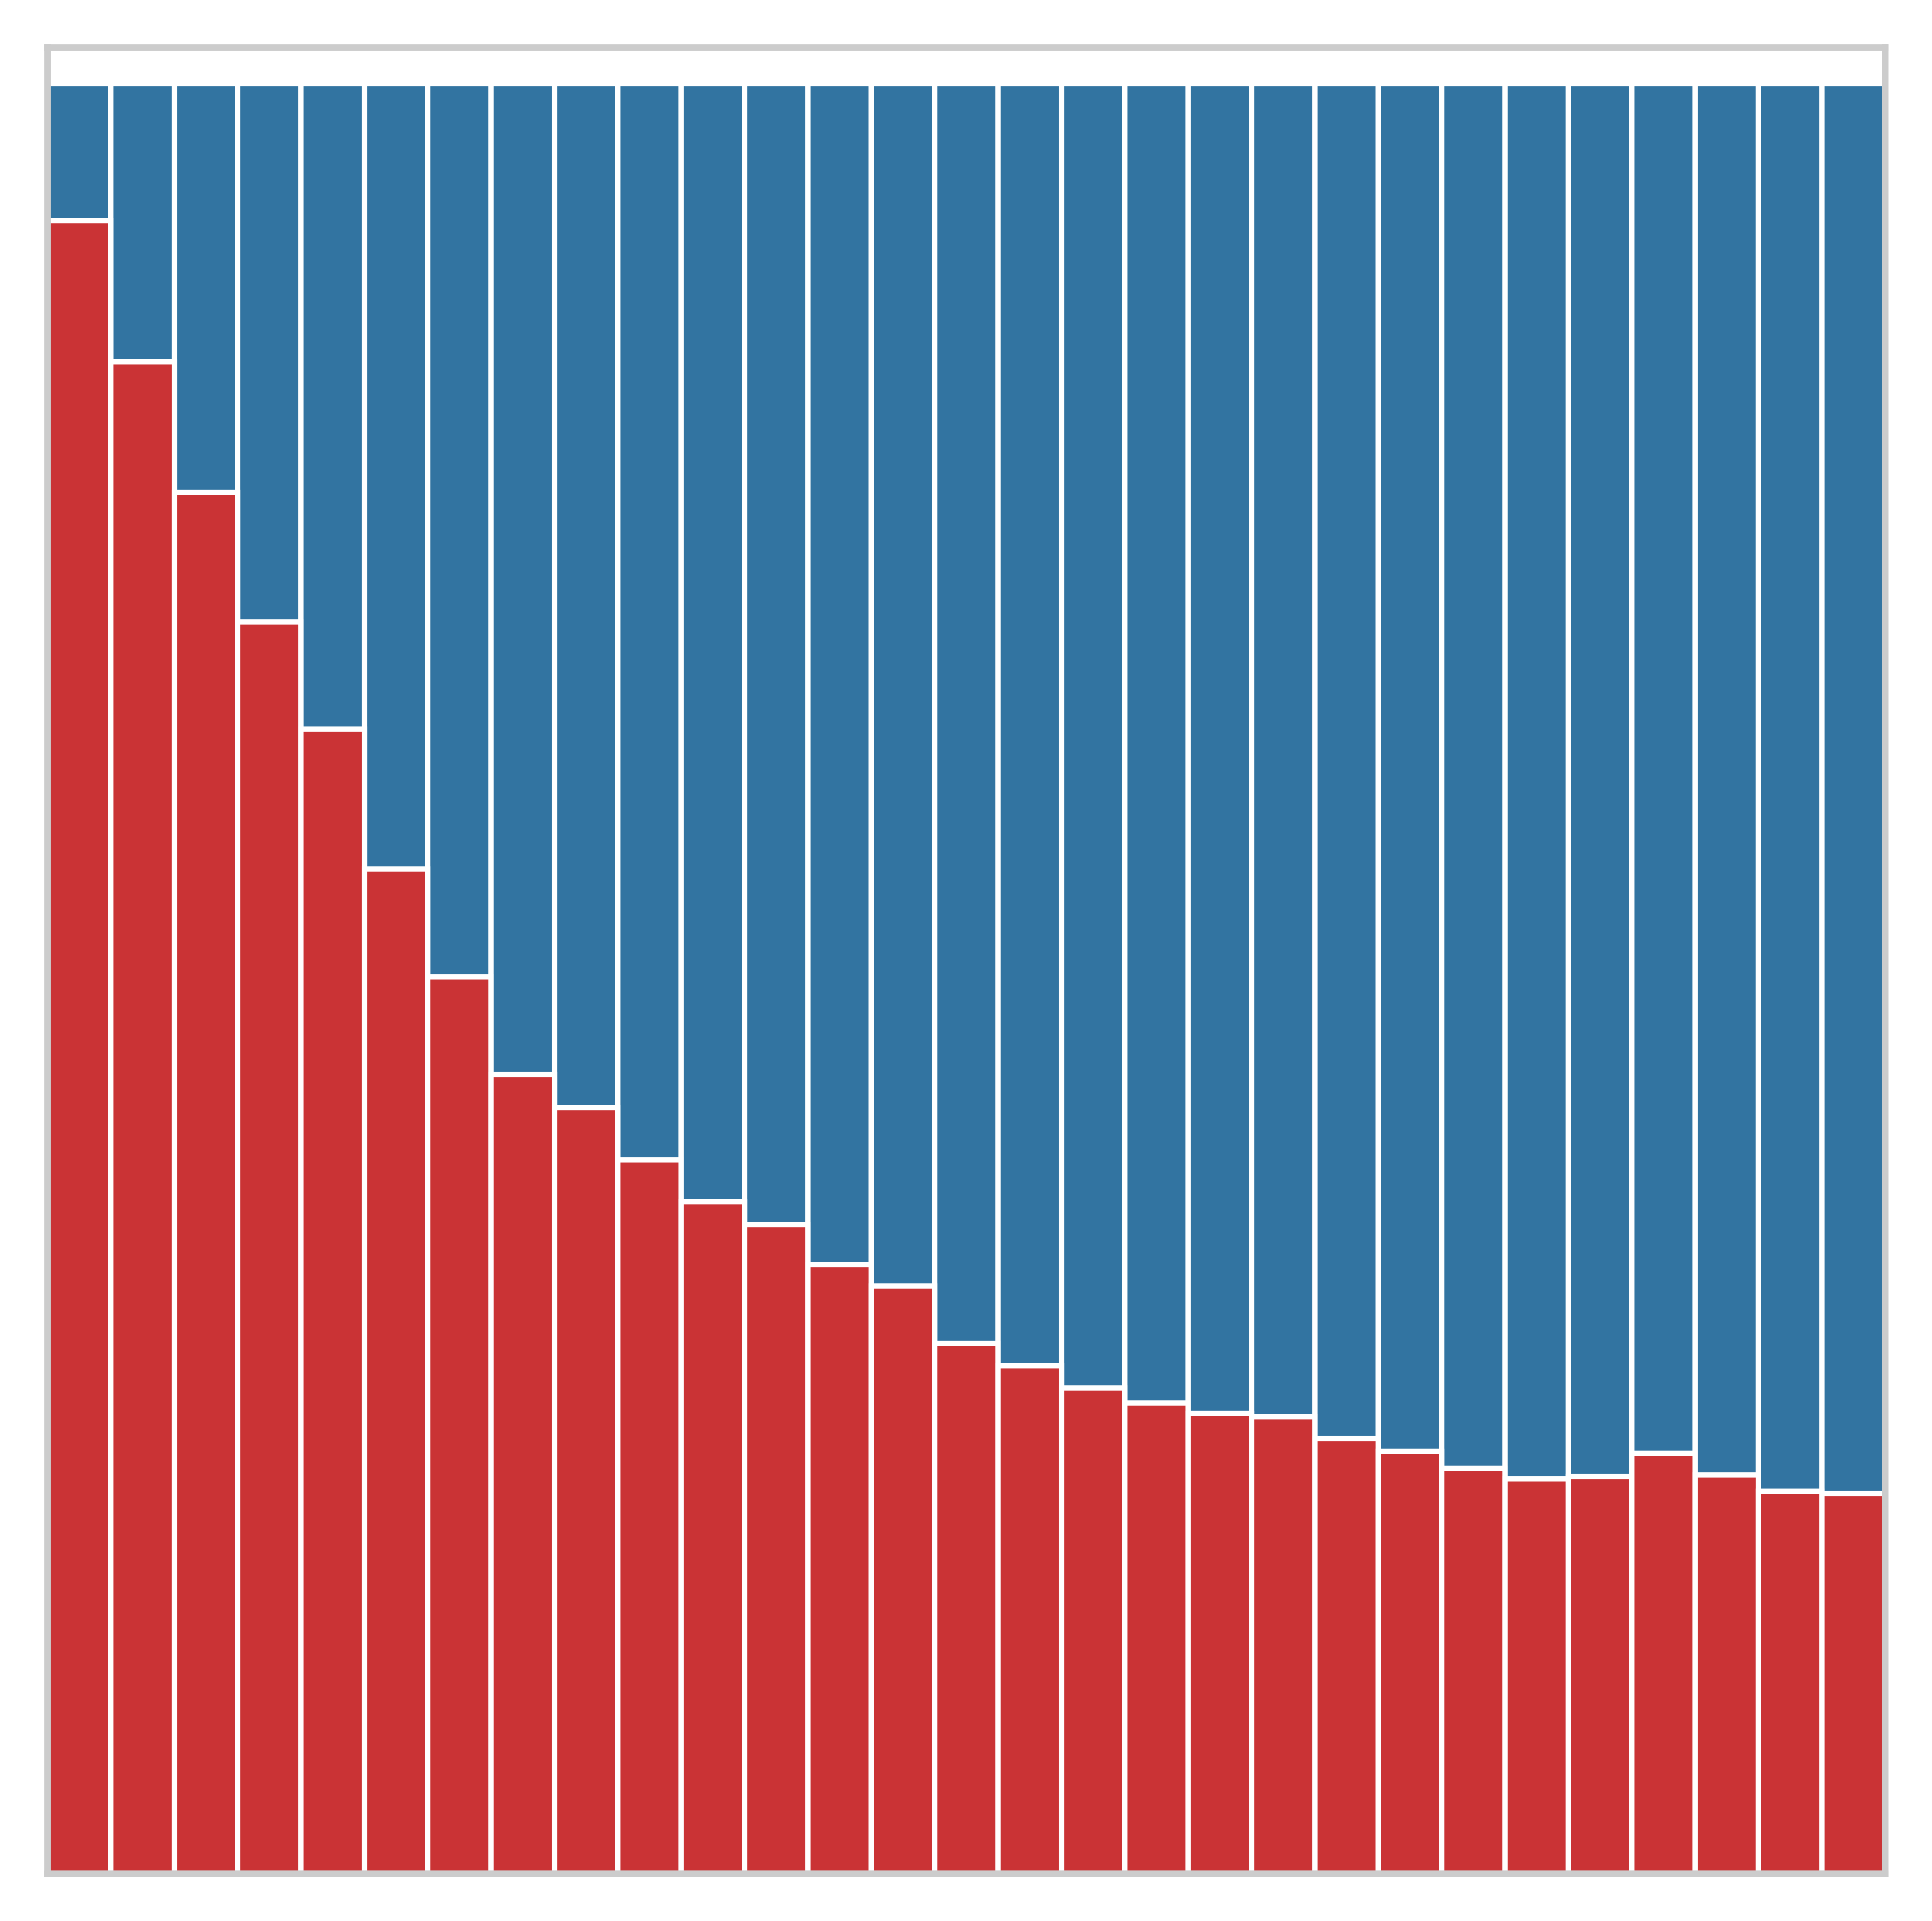

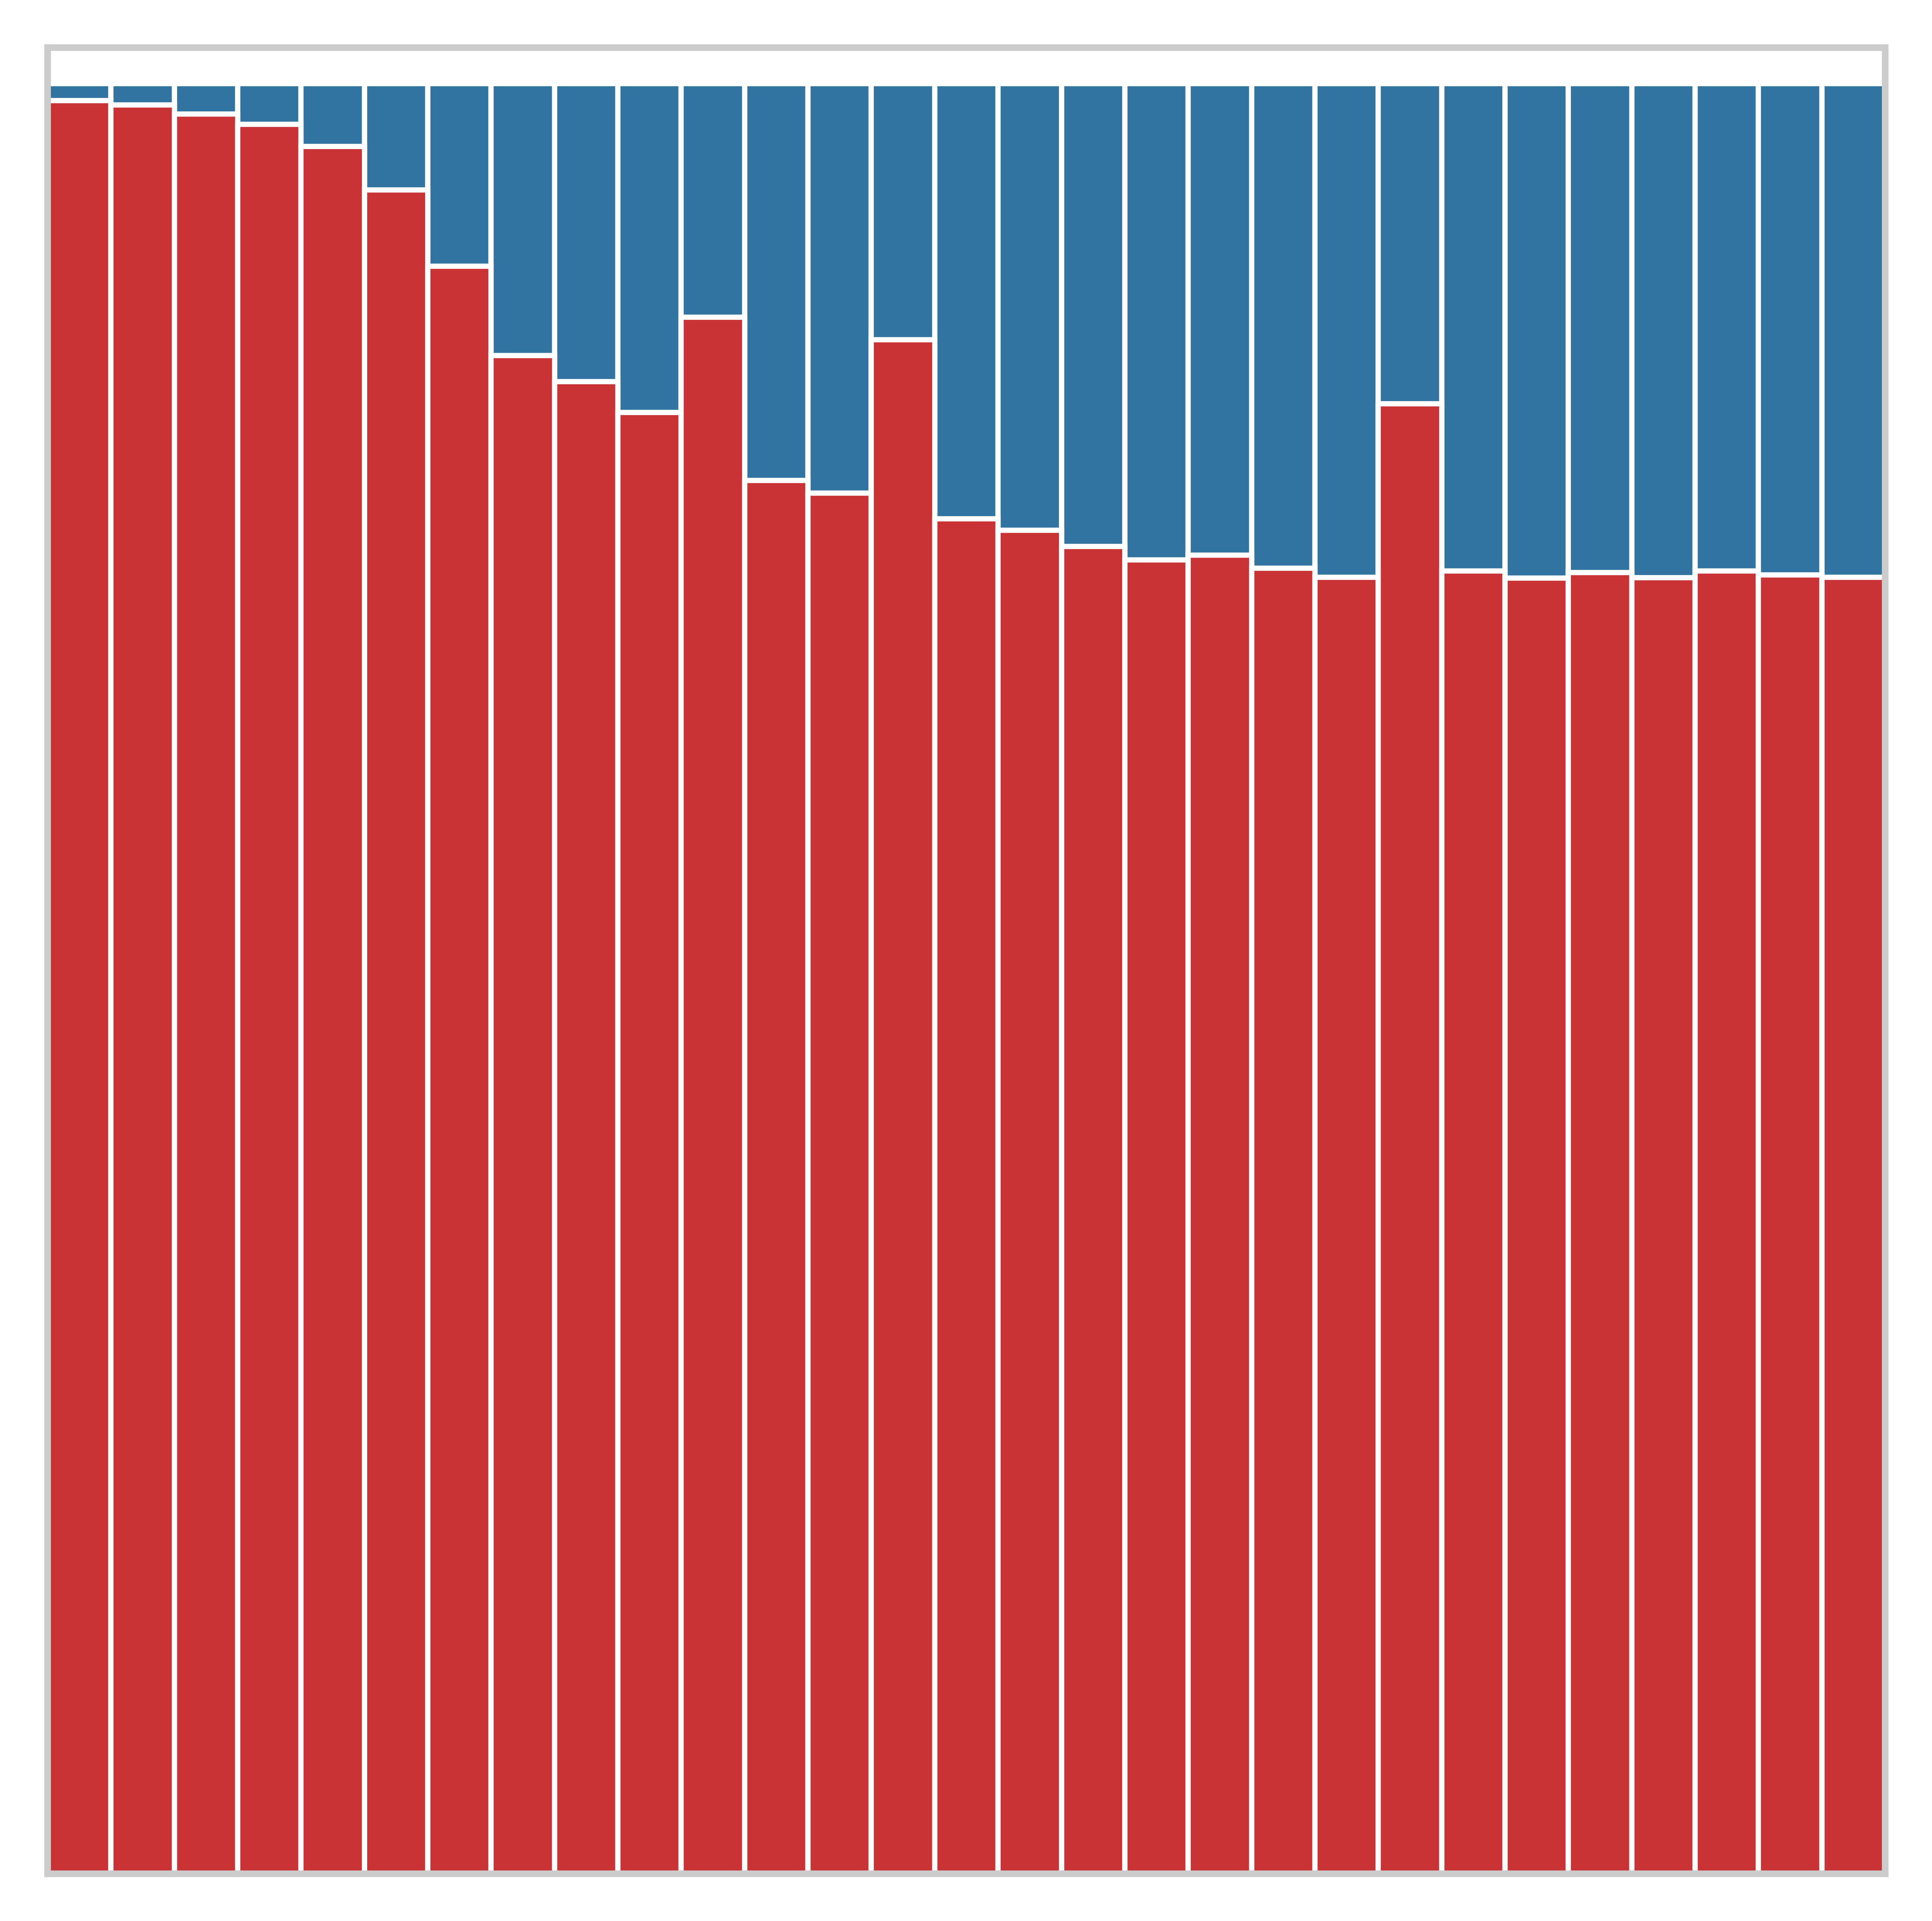

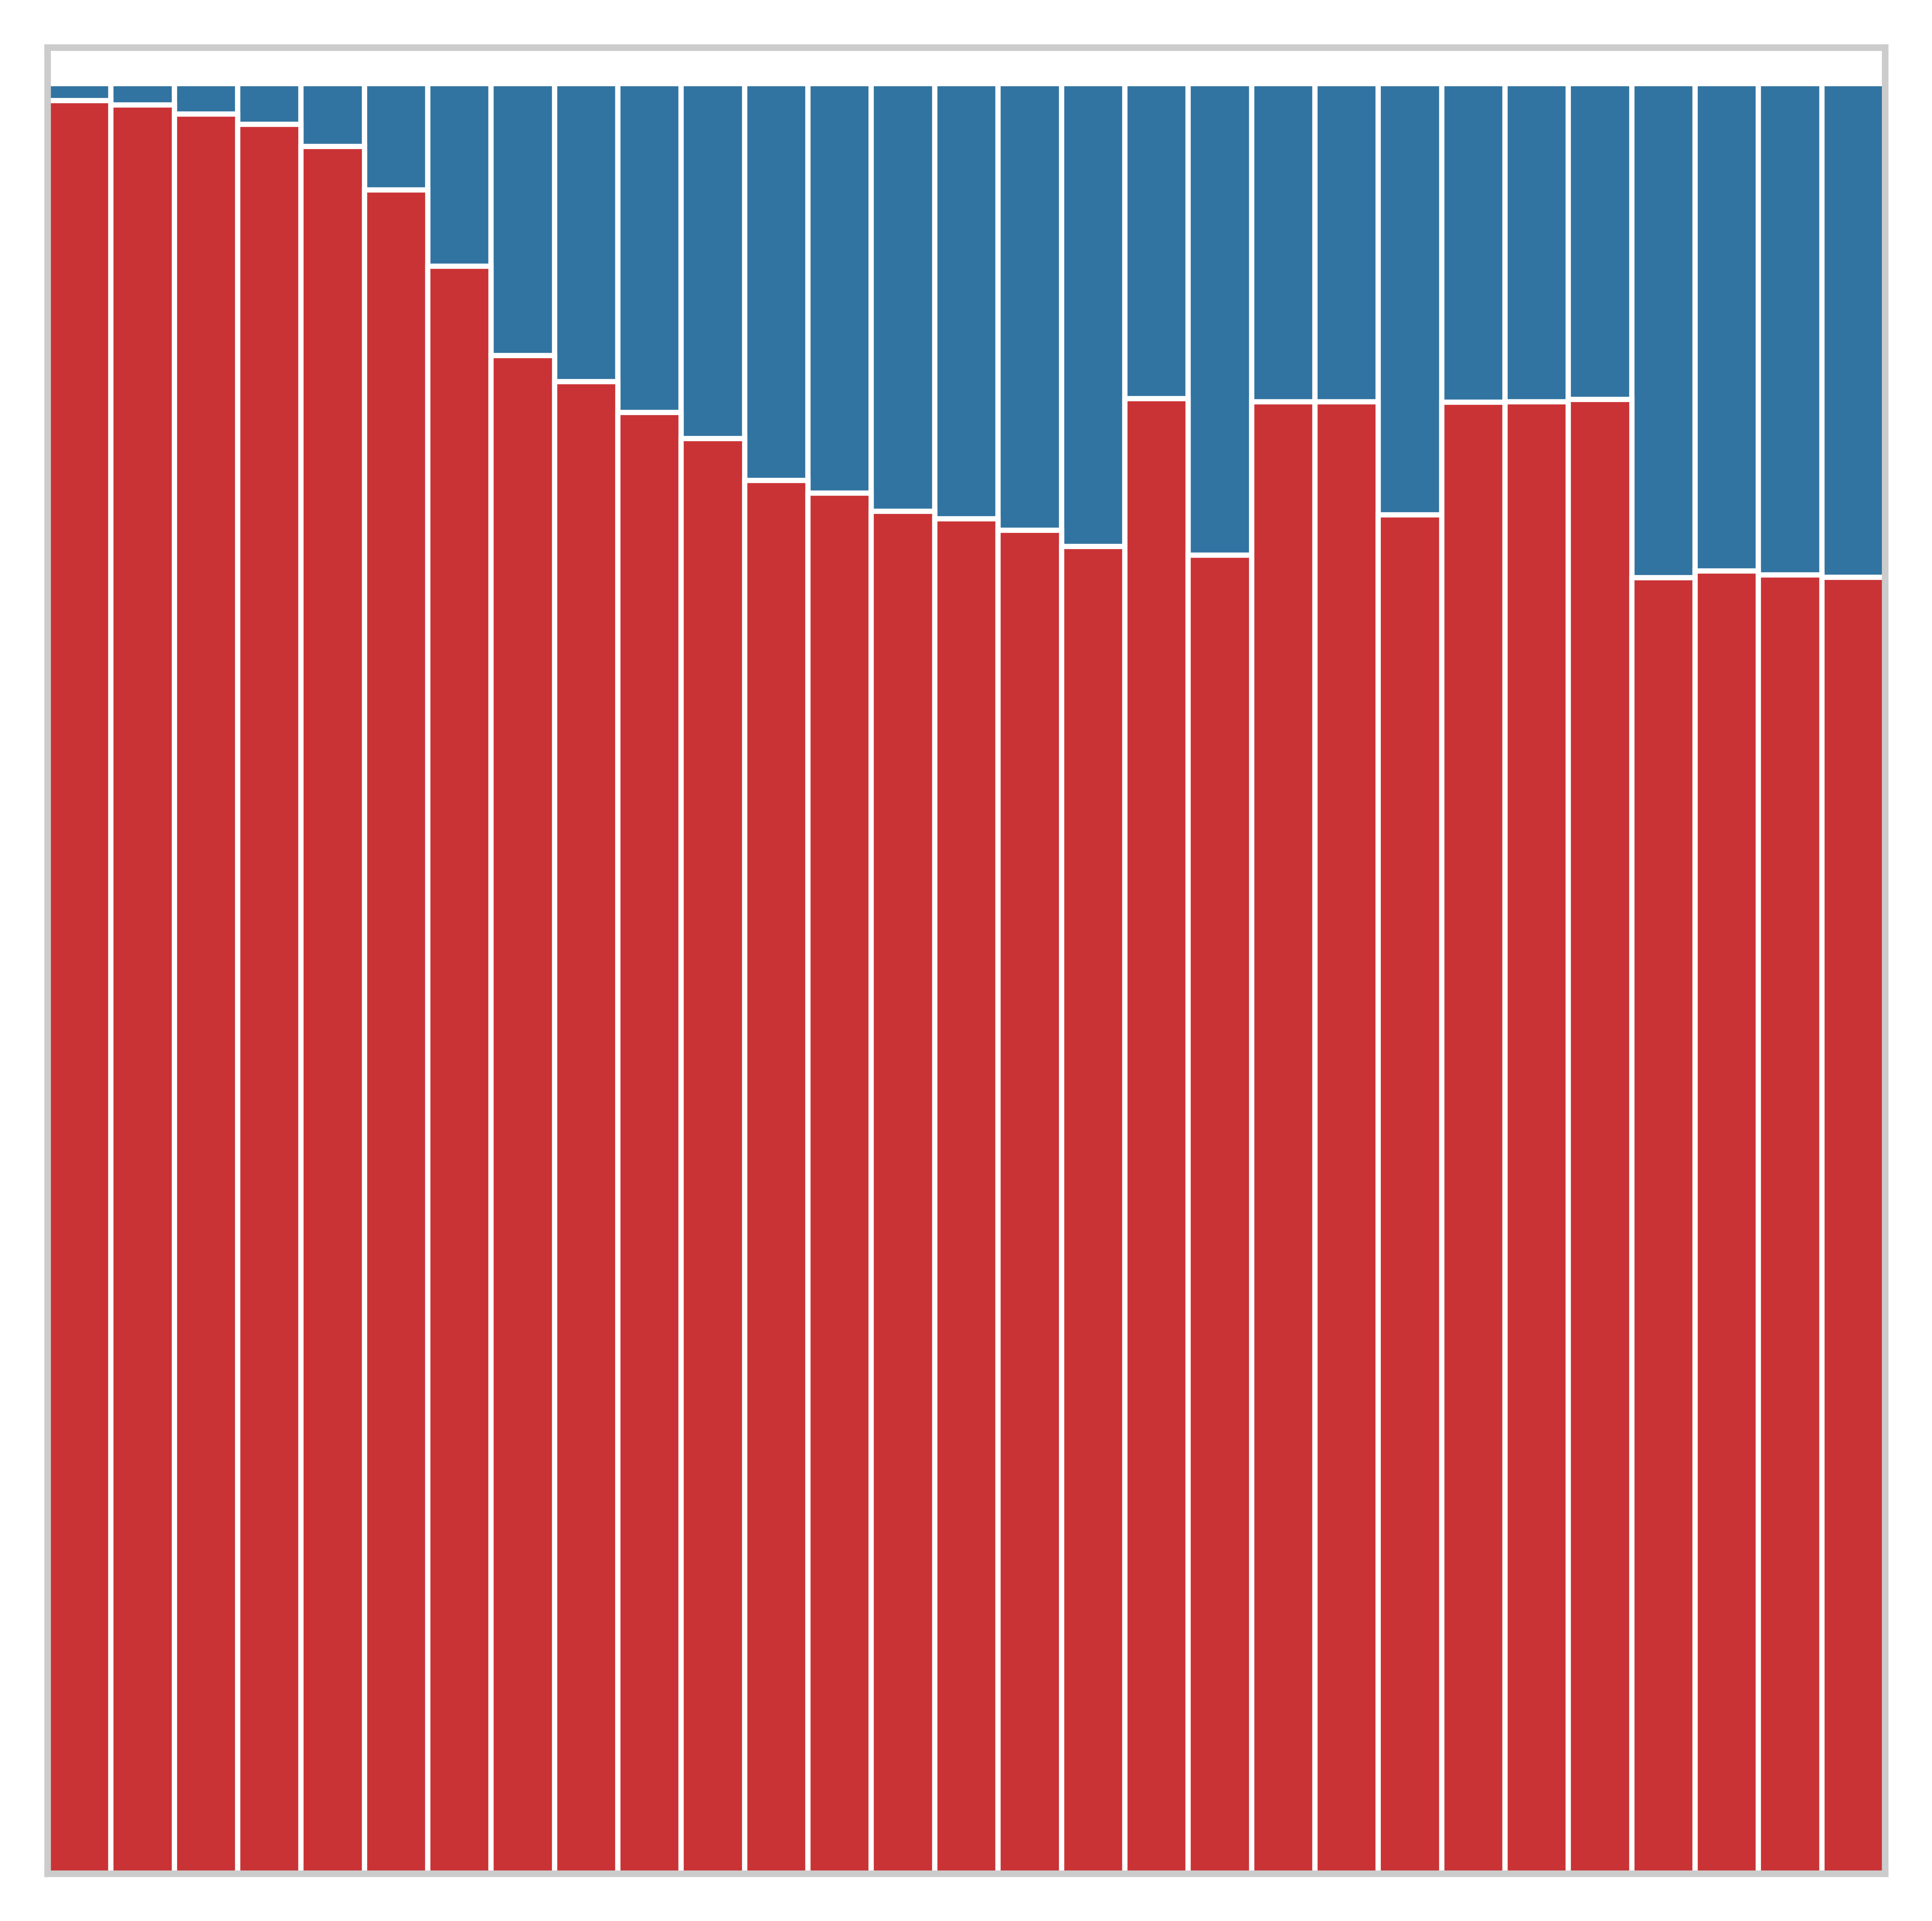

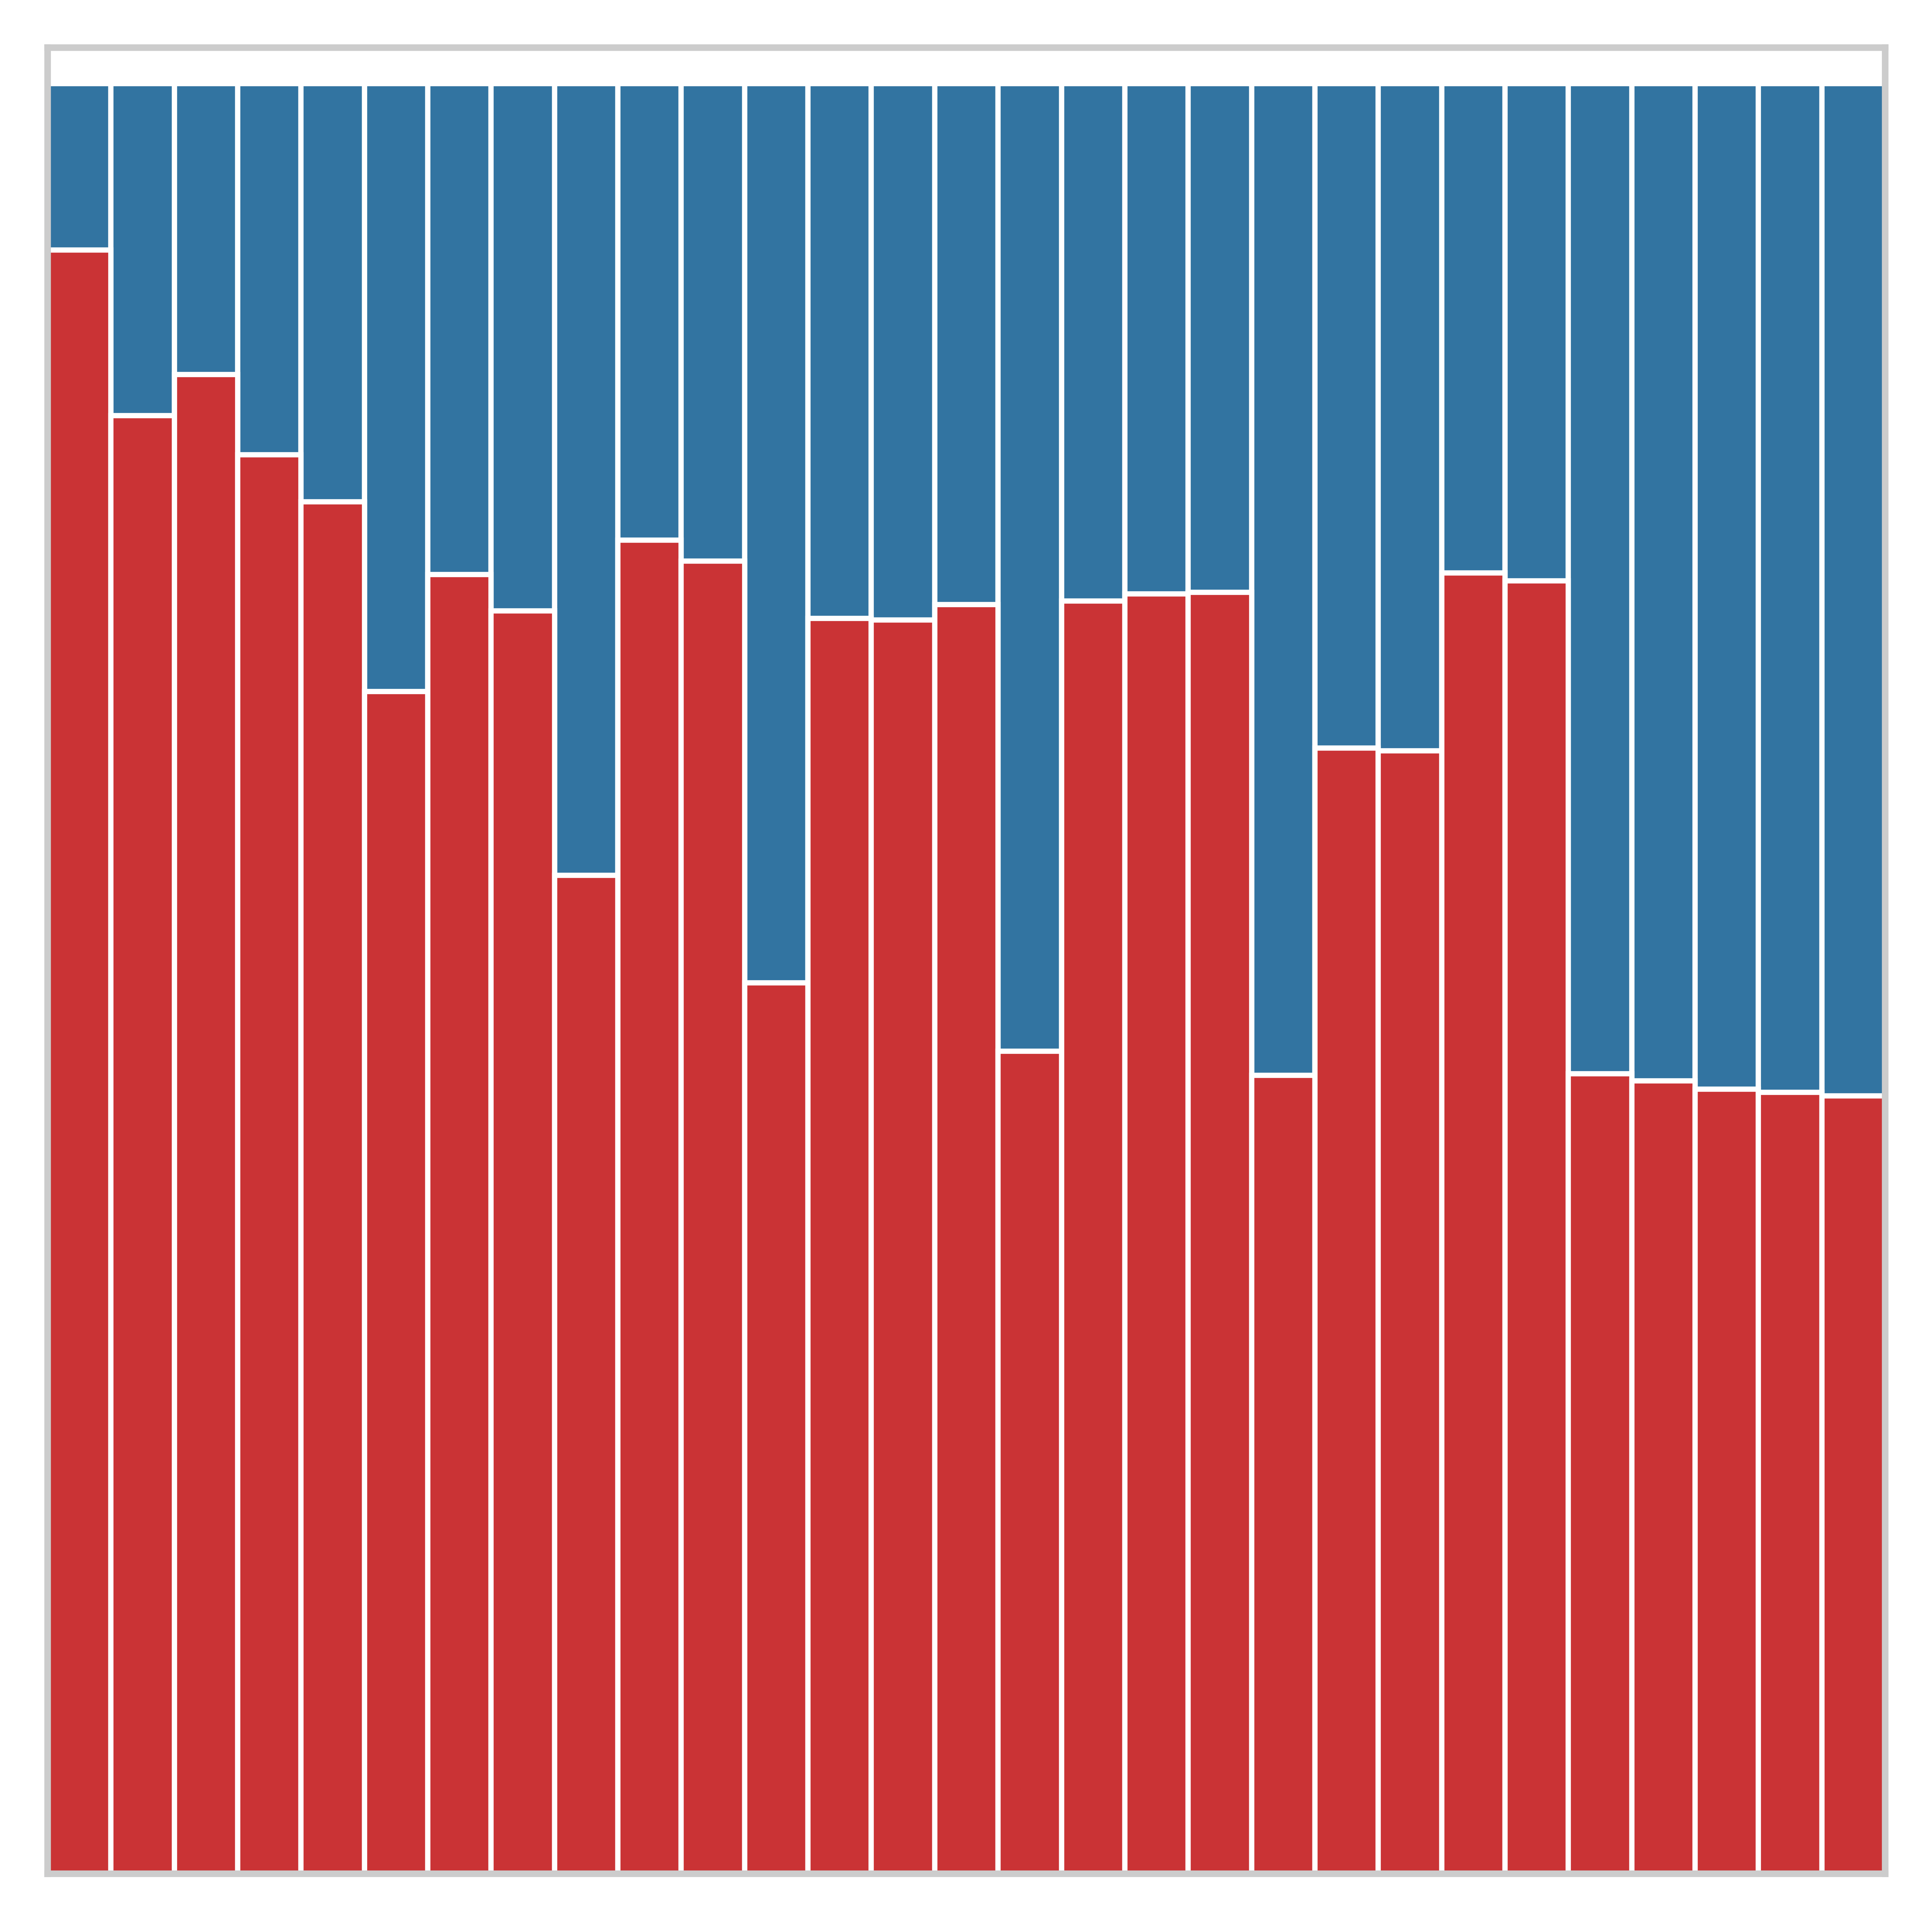

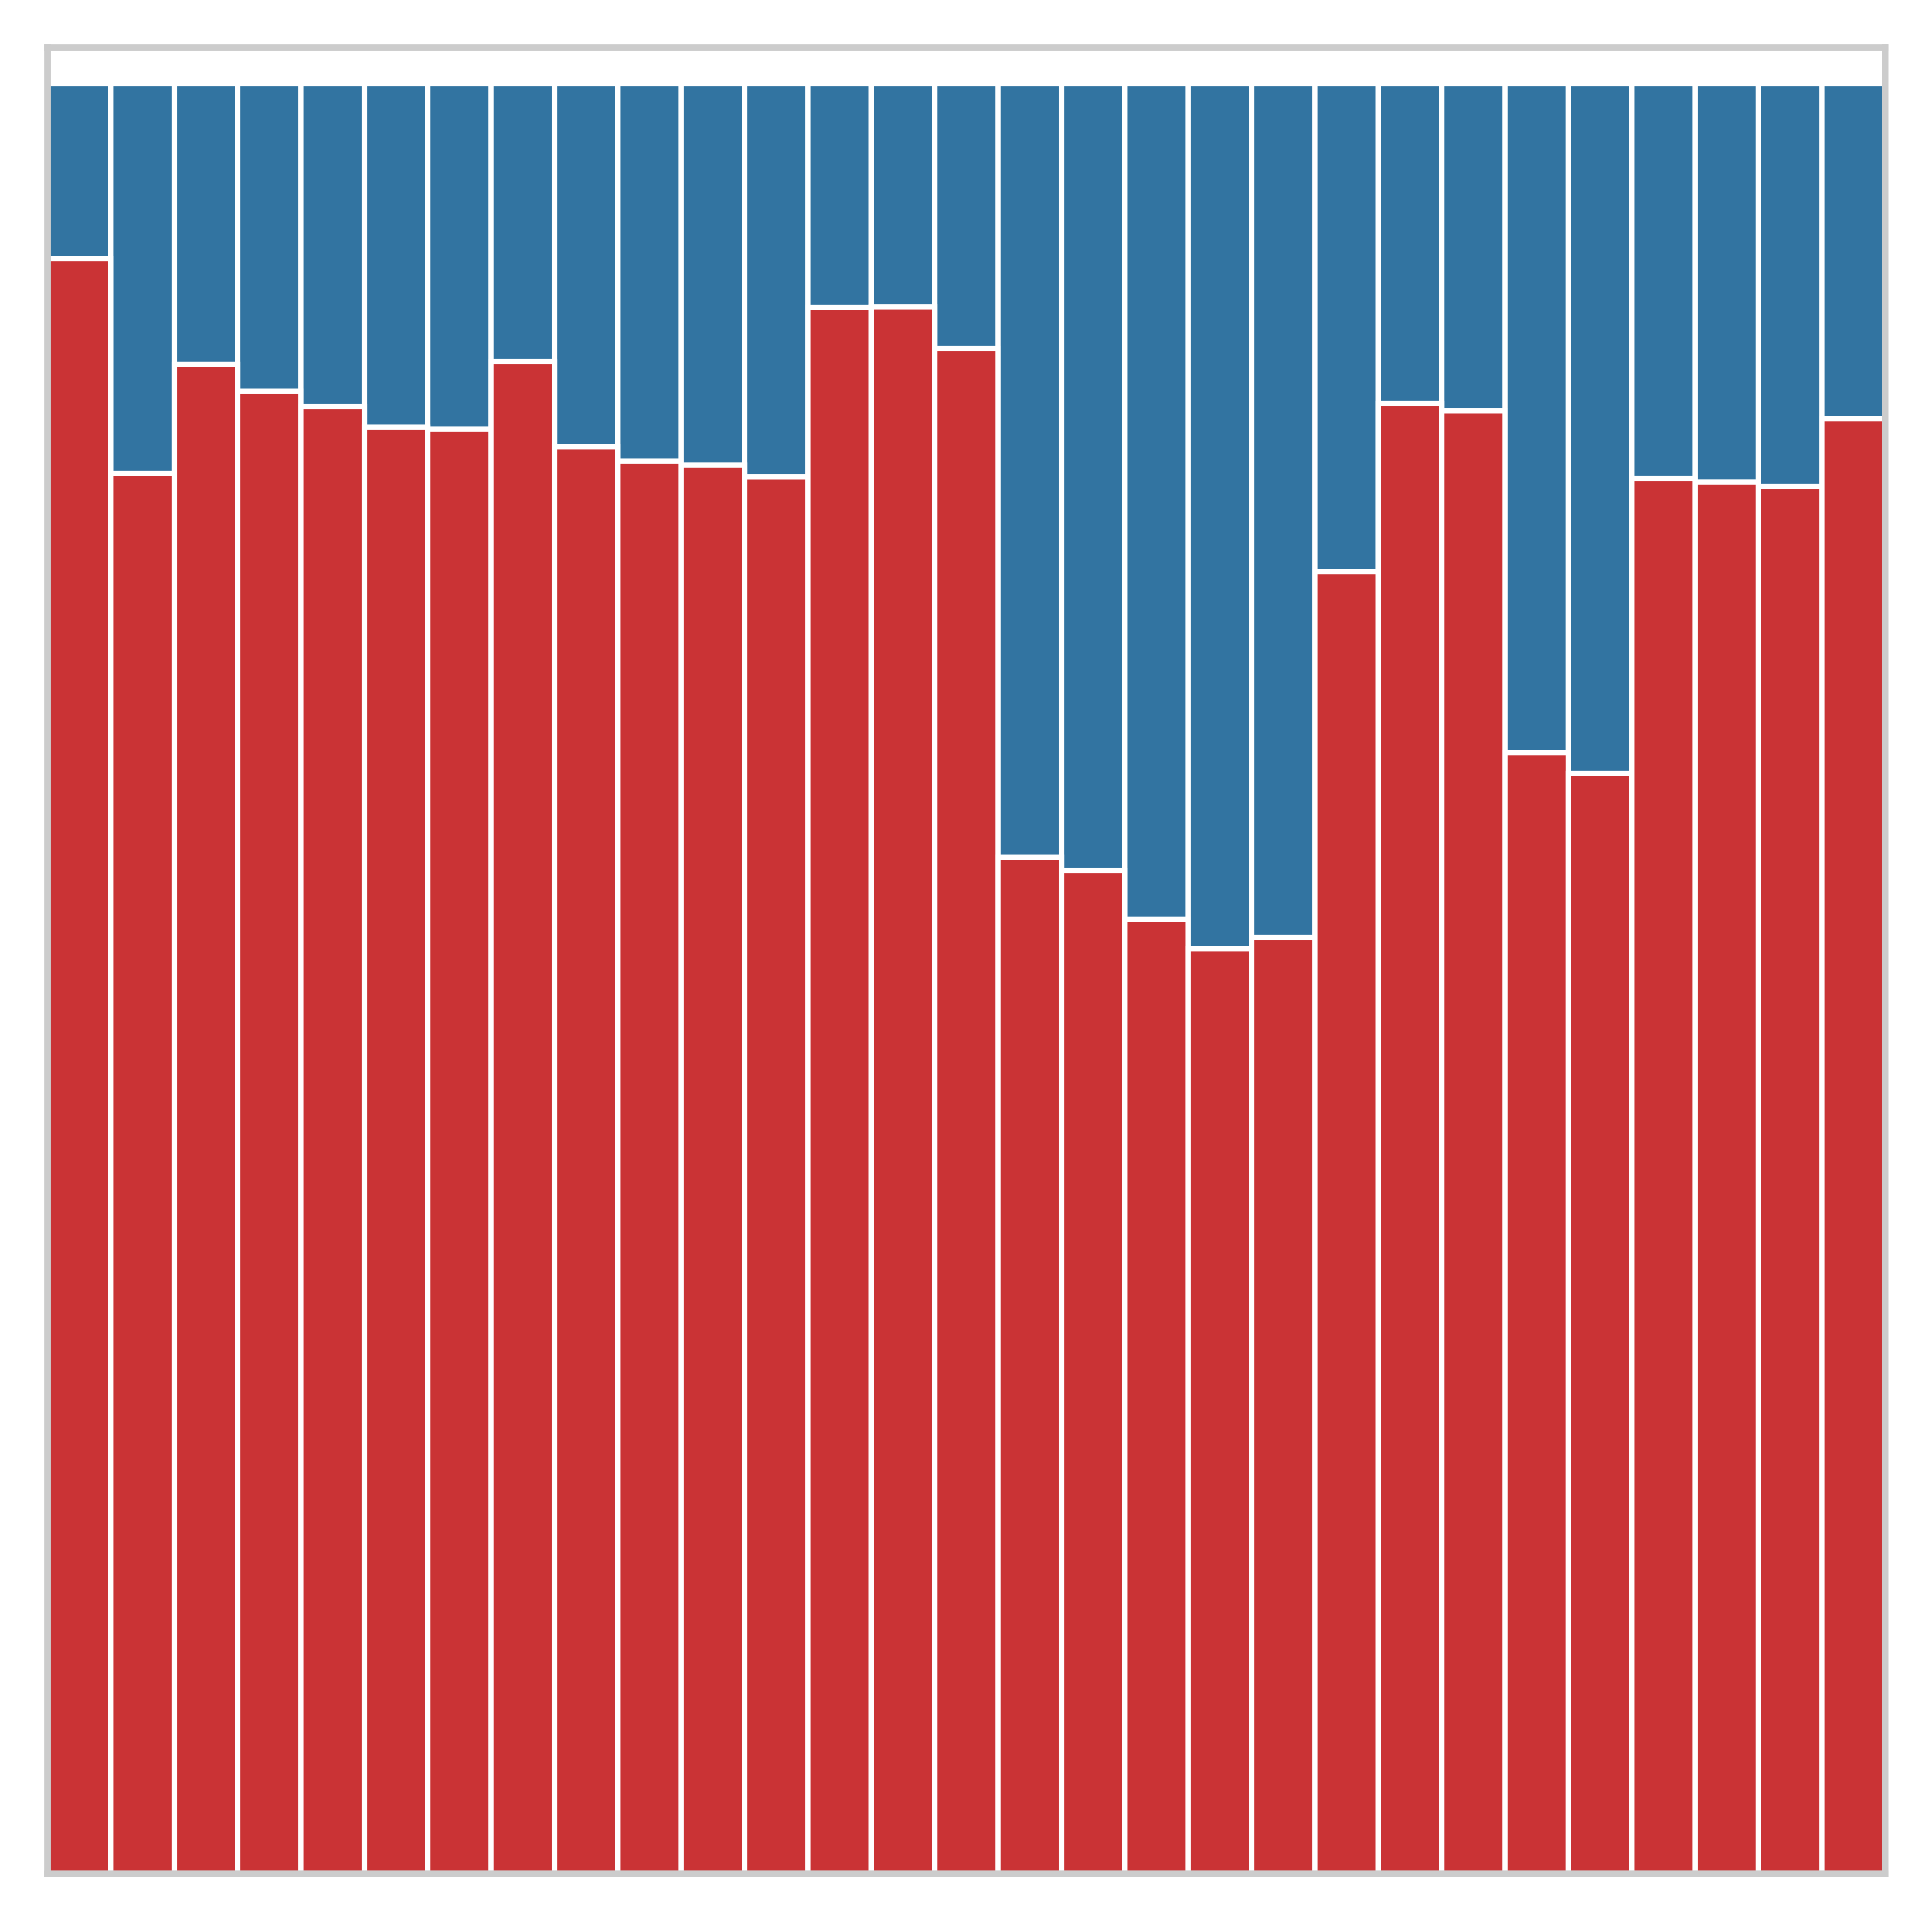

In [76]:
feature_df_15=pd.DataFrame(data=None)
c=0

for alg in ['XGB','RF']:
    for app in app_list_2[:4]:

        file_read='Results/Feature_Importances/{}/feature_importance{}_1.csv'.format(alg,app)
        full_df=pd.read_csv(file_read, header=None)
        full_df.columns=['Feature','Importance']
        full_df['Feature']=np.where(full_df['Feature'].str.contains("Absicherungsstatus"),'Absicherungsstatus',full_df['Feature'])
        full_df['Feature']=np.where((full_df['Feature'].str.contains("pte_plant")&(full_df['Feature']!='pte_plant_count')),'pte_plant',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature'].str.contains("pte_derivative"),'pte_derivative',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature'].str.contains("manufacturer_country"),'manufacturer_country',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="NON",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="MNG",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="PTE",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="NEU",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="FHW",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="BZW",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="SFD",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="ZB",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="SON",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="AI",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature']=="SNT",'change_type_detail',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature'].str.contains("context_type"),'context_type',full_df['Feature'])
        full_df['Feature']=np.where(full_df['Feature'].str.contains("change_type"),'change_type',full_df['Feature'])
        full_df=full_df.groupby('Feature', as_index=False).sum()
        full_df=full_df.sort_values('Importance', ascending=False, kind='mergesort').reset_index(drop=True)
        full_df['Prediction Point']='Prediction Point 1'
        # test_df.set_index('Feature', inplace=True)
        
        feature_df_15[['Feature_{}{}_pp1'.format(alg,app),'Importance_{}{}_pp1'.format(alg,app,i)]]=full_df[['Feature', 'Importance']].head(15)


        first_df=full_df

        for i in range(2,30):

            file_read='Results/Feature_Importances/{}/feature_importance{}_{}.csv'.format(alg,app,i)
            test_df=pd.read_csv(file_read, header=None)
            test_df.columns=['Feature','Importance']
            test_df['Feature']=np.where(test_df['Feature'].str.contains("Absicherungsstatus"),'Absicherungsstatus',test_df['Feature'])
            test_df['Feature']=np.where((test_df['Feature'].str.contains("pte_plant")&(test_df['Feature']!='pte_plant_count')),'pte_plant',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature'].str.contains("pte_derivative"),'pte_derivative',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature'].str.contains("manufacturer_country"),'manufacturer_country',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="NON",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="MNG",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="PTE",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="NEU",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="FHW",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="BZW",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="SFD",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="ZB",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="SON",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="AI",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature']=="SNT",'change_type_detail',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature'].str.contains("context_type"),'context_type',test_df['Feature'])
            test_df['Feature']=np.where(test_df['Feature'].str.contains("change_type"),'change_type',test_df['Feature'])
            test_df=test_df.groupby('Feature', as_index=False).sum()
            test_df=test_df.sort_values('Importance', ascending=False, kind='mergesort').reset_index(drop=True)
            test_df['Prediction Point']='Prediction Point {}'.format(i)
            # test_df.set_index('Feature', inplace=True)

            full_df=pd.concat([full_df, test_df])
            
            test_df.sort_values(by='Importance', ascending=False, inplace=True)
            feature_df_15[['Feature_{}{}_pp{}'.format(alg,app,i),'Importance_{}{}_pp{}'.format(alg,app,i)]]=test_df[['Feature', 'Importance']].head(15)

        full_df.reset_index(inplace=True, drop=True)    

        for row in range(len(full_df)):
            if full_df.loc[row,'Feature'] in static_list:
                full_df.loc[row,'Type']='Static'
            else:
                full_df.loc[row,'Type']='Dynamic'
        #         full_df.loc[row,'Importance']=1

        full_df.fillna(0, inplace=True)

        import matplotlib.patches as mpatches
        short_df=full_df.groupby(['Type','Prediction Point'],as_index=False, sort=False).sum()
        # load dataset
        short_df

        # set the figure size
        plt.figure(figsize=(5, 5))

        # from raw value to percentage
        total=short_df.groupby('Prediction Point',as_index=False, sort=False).sum()
        static = short_df[short_df.Type=='Static']

        # bar chart 1 -> top bars (group of 'smoker=No')
        bar1 = sns.barplot(x="Prediction Point",  y="Importance", data=total, color='#1f78b4',width=1)

        # bar chart 2 -> bottom bars (group of 'smoker=Yes')
        bar2 = sns.barplot(x="Prediction Point", y="Importance", data=static, color='#e31a1c',width=1)

        # add legend
        bar1.set_xticks([])
        bar2.set_xticks([])
        bar2.set_yticks([])
        bar1.set_yticks([])

        bar1.xaxis.set_tick_params(labelbottom=False)
        bar1.yaxis.set_tick_params(labelleft=False)        
        bar2.xaxis.set_tick_params(labelbottom=False)
        bar2.yaxis.set_tick_params(labelleft=False)
        
        
        # show the graph
        plt.margins(0,0)
        plt.xlabel(None)
        plt.ylabel(None)
        plt.ylim(0,1.02)
        #plt.savefig('Feature_Importance_{}{}.svg'.format(alg,app), bbox_inches='tight',pad_inches = 0, dpi=1200)
        


        #plt.legend()

        
        
        

In [77]:
feature_list=list(full_df['Feature'].unique())

In [78]:
long_df_feature=pd.DataFrame(data=None)
feature_list=[]
for col in feature_df_15.iloc[:15,range(0,464,2)].columns:
        feature_list.append(list(feature_df_15.loc[:5,col]))
    
long_df_feature['Feature']=feature_list

In [79]:
long_df_feature.explode(column='Feature').value_counts()

Feature                         
pte_derivative                      232
is_launch                           232
manufacturer_country                229
pte_plant                           225
building_phase_pulk                 191
has_ldl                              82
change_type                          63
id_Task_T0006                        27
Assessed_Manufacturer_Experience     22
Absicherungsstatus                   16
id_Task_T0033                        14
unique_id_count                      10
activity->zet_T0047                  10
activity->po_T0047                   10
activity->po_NAEL_ERLED               9
activity->ctp_NAEL_ERLED              5
event_nr_T0006                        3
event_nr_T0047                        3
description_7_T0047                   1
event_nr_17                           1
event_nr_T0007                        1
activity->sti_T0027                   1
activity->sti_T0006                   1
activity->po_T0059                    1
id_Task

In [98]:
feature_df_15.iloc[:10,406:].T

0                    1  \
Feature_RF_idx_pp1      building_phase_pulk            is_launch   
Importance_RF_idx_pp1              0.203007             0.182449   
Feature_RF_idx_pp2                is_launch  building_phase_pulk   
Importance_RF_idx_pp2              0.192405             0.173704   
Feature_RF_idx_pp3                is_launch  building_phase_pulk   
Importance_RF_idx_pp3              0.286123             0.207786   
Feature_RF_idx_pp4                is_launch  building_phase_pulk   
Importance_RF_idx_pp4               0.29361             0.199568   
Feature_RF_idx_pp5                is_launch  building_phase_pulk   
Importance_RF_idx_pp5              0.290686             0.200952   
Feature_RF_idx_pp6                is_launch  building_phase_pulk   
Importance_RF_idx_pp6              0.290442             0.192831   
Feature_RF_idx_pp7                is_launch  building_phase_pulk   
Importance_RF_idx_pp7              0.279341             0.210115   
Feature_RF_idx_pp8                is_launch  building_phase_pulk   
Importance_RF_idx_pp8              0.341323             0.205502   
Feature_RF_idx_pp9                is_launch  building_phase_pulk   
Importance_RF_idx_pp9              0.310855             0.178516   
Feature_RF_idx_pp10               is_launch  building_phase_pulk   
Importance_RF_idx_pp10             0.271421             0.215854   
Feature_RF_idx_pp11               is_launch  building_phase_pulk   
Importance_RF_idx_pp11             0.278604              0.20862   
Feature_RF_idx_pp12               is_launch  building_phase_pulk   
Importance_RF_idx_pp12             0.269761             0.209949   
Feature_RF_idx_pp13               is_launch  building_phase_pulk   
Importance_RF_idx_pp13             0.365116             0.272465   
Feature_RF_idx_pp14               is_launch  building_phase_pulk   
Importance_RF_idx_pp14             0.358647             0.286515   
Feature_RF_idx_pp15               is_launch  building_phase_pulk   
Importance_RF_idx_pp15             0.358256             0.269395   
Feature_RF_idx_pp16               is_launch  building_phase_pulk   
Importance_RF_idx_pp16             0.166383             0.160789   
Feature_RF_idx_pp17     building_phase_pulk            is_launch   
Importance_RF_idx_pp17             0.168531             0.155332   
Feature_RF_idx_pp18     building_phase_pulk            is_launch   
Importance_RF_idx_pp18             0.161464             0.144403   
Feature_RF_idx_pp19     building_phase_pulk            is_launch   
Importance_RF_idx_pp19             0.153934              0.14851   
Feature_RF_idx_pp20     building_phase_pulk            is_launch   
Importance_RF_idx_pp20             0.171216             0.138145   
Feature_RF_idx_pp21               is_launch  building_phase_pulk   
Importance_RF_idx_pp21             0.249426             0.204314   
Feature_RF_idx_pp22               is_launch  building_phase_pulk   
Importance_RF_idx_pp22             0.361502             0.260409   
Feature_RF_idx_pp23               is_launch  building_phase_pulk   
Importance_RF_idx_pp23             0.335091             0.291408   
Feature_RF_idx_pp24               is_launch  building_phase_pulk   
Importance_RF_idx_pp24             0.212238             0.162382   
Feature_RF_idx_pp25     building_phase_pulk            is_launch   
Importance_RF_idx_pp25             0.200277             0.174157   
Feature_RF_idx_pp26               is_launch  building_phase_pulk   
Importance_RF_idx_pp26             0.306043             0.210253   
Feature_RF_idx_pp27               is_launch  building_phase_pulk   
Importance_RF_idx_pp27             0.309232              0.20345   
Feature_RF_idx_pp28               is_launch  building_phase_pulk   
Importance_RF_idx_pp28             0.307998             0.202092   
Feature_RF_idx_pp29               is_launch  building_phase_pulk   
Importance_RF_idx_pp29             0.332465             0.281098   

                             

In [ ]:
max_df=full_df.groupby('Feature').max('Importance')['Importance'].reset_index()
max_df['Feature_renamed']=np.where(max_df['Importance']<0.01,'other',max_df['Feature'])

In [ ]:
full_df=full_df.join(max_df.drop('Importance',axis=1).set_index('Feature'), on='Feature')

In [ ]:
full_df.sort_values('Importance', ascending=True, kind='mergesort', inplace=True )
full_df.sort_values('Prediction Point', ascending=True, kind='mergesort', inplace=True)

In [ ]:
full_df['Feature_renamed'].unique()

In [ ]:
full_df.to_excel('Importance.xlsx')

In [73]:
feature_df_15[:5].T

0                     1  \
Feature_XGB_agg_base_pp1     pte_derivative  manufacturer_country   
Importance_XGB_agg_base_pp1        0.292484              0.120545   
Feature_XGB_agg_base_pp2     pte_derivative             is_launch   
Importance_XGB_agg_base_pp2        0.275114              0.137047   
Feature_XGB_agg_base_pp3     pte_derivative  manufacturer_country   
...                                     ...                   ...   
Importance_RF_idx_pp27             0.309232               0.20345   
Feature_RF_idx_pp28               is_launch   building_phase_pulk   
Importance_RF_idx_pp28             0.307998              0.202092   
Feature_RF_idx_pp29               is_launch   building_phase_pulk   
Importance_RF_idx_pp29             0.332465              0.281098   

                                          2                     3  \
Feature_XGB_agg_base_pp1          pte_plant             is_launch   
Importance_XGB_agg_base_pp1        0.115098              0.107431   
Feature_XGB_agg_base_pp2          pte_plant  manufacturer_country   
Importance_XGB_agg_base_pp2        0.125026              0.120601   
Feature_XGB_agg_base_pp3          is_launch             pte_plant   
...                                     ...                   ...   
Importance_RF_idx_pp27             0.099469              0.067664   
Feature_RF_idx_pp28          pte_derivative             pte_plant   
Importance_RF_idx_pp28             0.100043              0.063637   
Feature_RF_idx_pp29          pte_derivative  manufacturer_country   
Importance_RF_idx_pp29             0.067964              0.059968   

                                                4  
Feature_XGB_agg_base_pp1              change_type  
Importance_XGB_agg_base_pp1              0.061675  
Feature_XGB_agg_base_pp2              change_type  
Importance_XGB_agg_base_pp2              0.043364  
Feature_XGB_agg_base_pp3      building_phase_pulk  
...                                           ...  
Importance_RF_idx_pp27                   0.035443  
Feature_RF_idx_pp28          manufacturer_country  
Importance_RF_idx_pp28                    0.03501  
Feature_RF_idx_pp29                     pte_plant  
Importance_RF_idx_pp29                   0.040135  

[464 rows x 5 columns]